In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
def load_and_prepare_data(filename, coin_name):
    
    df = pd.read_csv(filename)

    df.rename(columns={"time_period_end": "time"}, inplace=True)

    df["time"] = pd.to_datetime(df["time"])

    df.sort_values("time", inplace=True)

    df[coin_name + "_return"] = df["price_close"].pct_change()
    
    return df[["time", coin_name + "_return"]]

In [50]:
avax_df  = load_and_prepare_data("../data/hourly_crypto_data/avax_hourly.csv",  "avax")
btc_df   = load_and_prepare_data("../data/hourly_crypto_data/btc_hourly.csv",   "btc")
eth_df   = load_and_prepare_data("../data/hourly_crypto_data/eth_hourly.csv",   "eth")
matic_df = load_and_prepare_data("../data/hourly_crypto_data/matic_hourly.csv", "matic")
sol_df   = load_and_prepare_data("../data/hourly_crypto_data/sol_hourly.csv",   "sol")
bnb_df   = load_and_prepare_data("../data/hourly_crypto_data/bnb_hourly.csv",   "bnb")
cardano_df   = load_and_prepare_data("../data/hourly_crypto_data/cardano_hourly.csv",   "cardano")
link_df   = load_and_prepare_data("../data/hourly_crypto_data/link_hourly.csv",   "link")
xrp_df   = load_and_prepare_data("../data/hourly_crypto_data/xrp_hourly.csv",   "xrp")
tron_df   = load_and_prepare_data("../data/hourly_crypto_data/tron_hourly.csv",   "tron")
arbitrum_df   = load_and_prepare_data("../data/hourly_crypto_data/arbitrum_hourly.csv",   "arbitrum")
bch_df   = load_and_prepare_data("../data/hourly_crypto_data/bch_hourly.csv",   "bch")

In [6]:
avax_df.head()

,time,avax_return
0,2020-09-22 07:00:00+00:00,NaN
1,2020-09-22 08:00:00+00:00,0.005839
2,2020-09-22 09:00:00+00:00,0.389502
3,2020-09-22 10:00:00+00:00,-0.089579
4,2020-09-22 11:00:00+00:00,-0.116040


In [7]:
btc_df.head()

,time,btc_return
0,2015-01-14 17:00:00+00:00,NaN
1,2015-01-14 19:00:00+00:00,0.000484
2,2015-01-14 20:00:00+00:00,-0.354839
3,2015-01-15 02:00:00+00:00,0.600000
4,2015-01-15 05:00:00+00:00,-0.218750


In [8]:
eth_df.head()

,time,eth_return
0,2017-08-17 05:00:00+00:00,NaN
1,2017-08-17 06:00:00+00:00,0.004940
2,2017-08-17 07:00:00+00:00,-0.001386
3,2017-08-17 08:00:00+00:00,0.017444
4,2017-08-17 09:00:00+00:00,0.002143


In [9]:
matic_df.head()

,time,matic_return
0,2019-04-26 16:00:00+00:00,NaN
1,2019-04-26 17:00:00+00:00,-0.080952
2,2019-04-26 18:00:00+00:00,-0.082902
3,2019-04-26 19:00:00+00:00,-0.058380
4,2019-04-26 20:00:00+00:00,-0.010000


In [10]:
sol_df.head()

,time,sol_return
0,2020-08-11 07:00:00+00:00,NaN
1,2020-08-11 08:00:00+00:00,-0.009859
2,2020-08-11 09:00:00+00:00,0.012866
3,2020-08-11 10:00:00+00:00,-0.035709
4,2020-08-11 11:00:00+00:00,0.015170


In [11]:
def plot_cumulative_return_data(df, coin_name, title='Cumulative Returns', figsize=(10, 6)):
    return_column = coin_name + "_return"
    df["cumulative_return"] = (1 + df[return_column]).cumprod() - 1

    plt.figure(figsize=figsize)
    plt.plot(df["time"], df["cumulative_return"], linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()


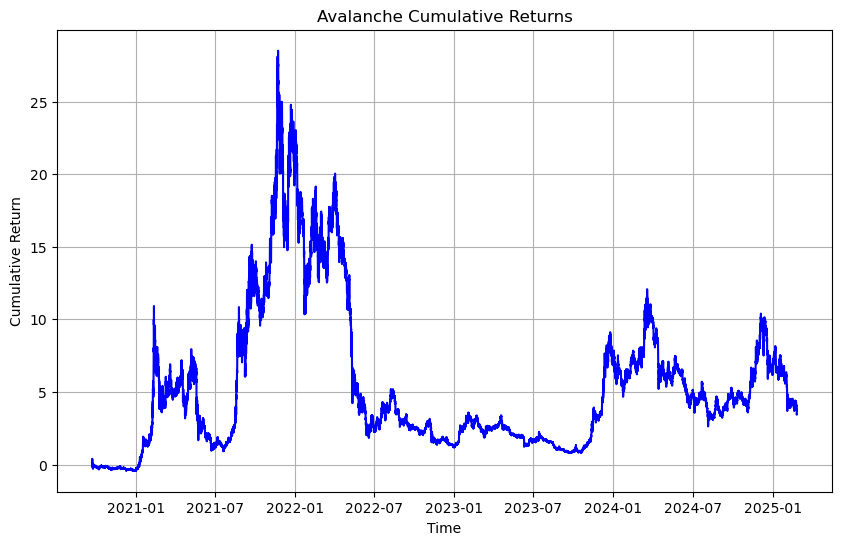

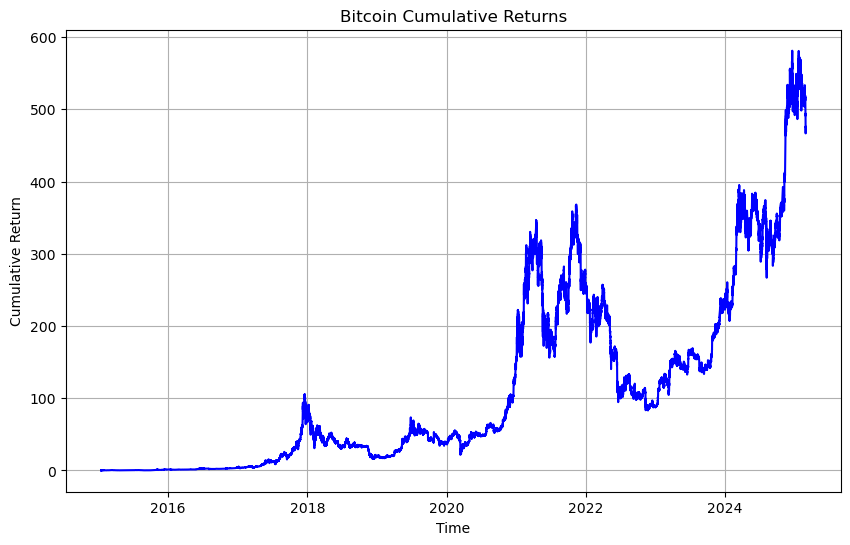

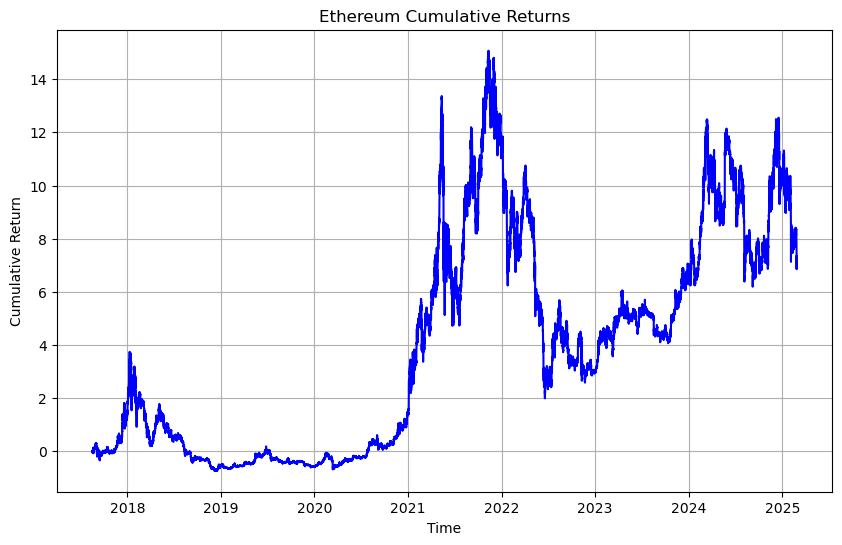

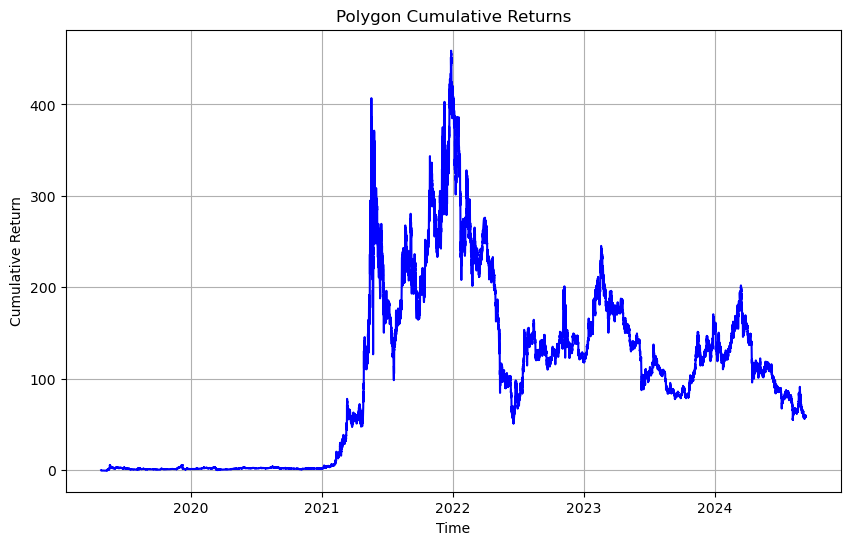

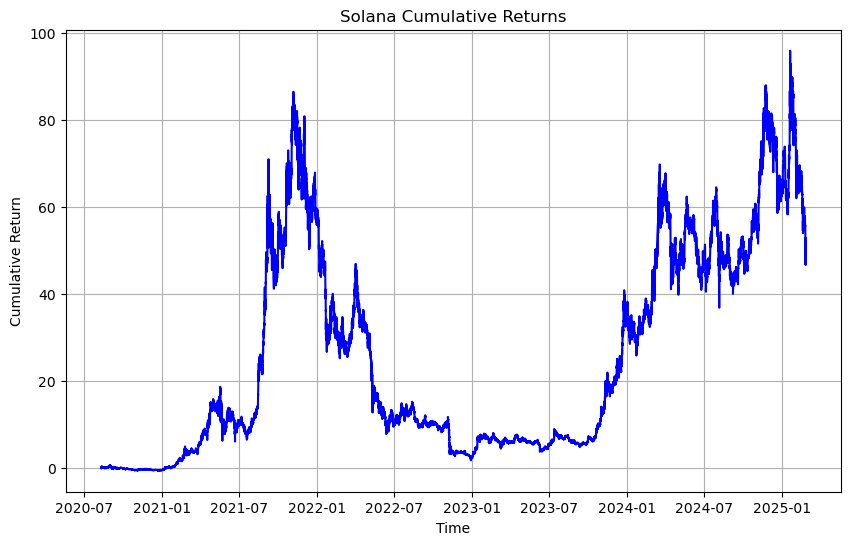

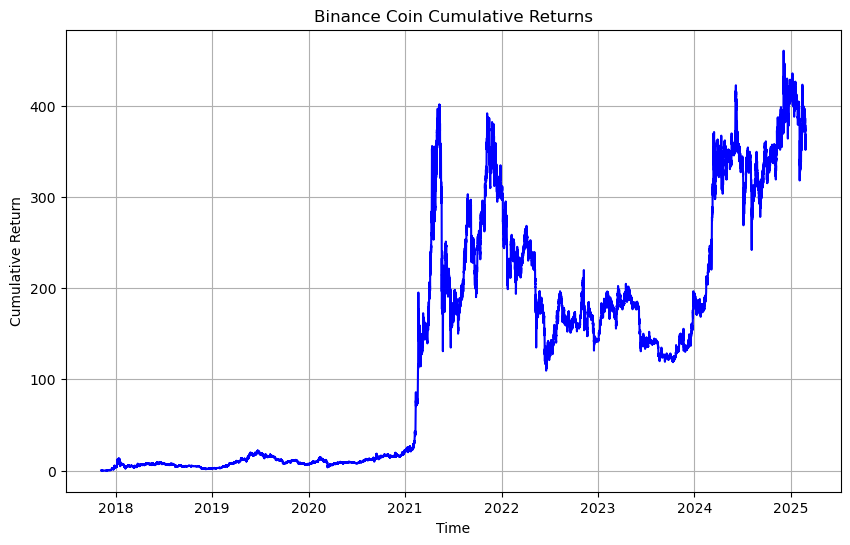

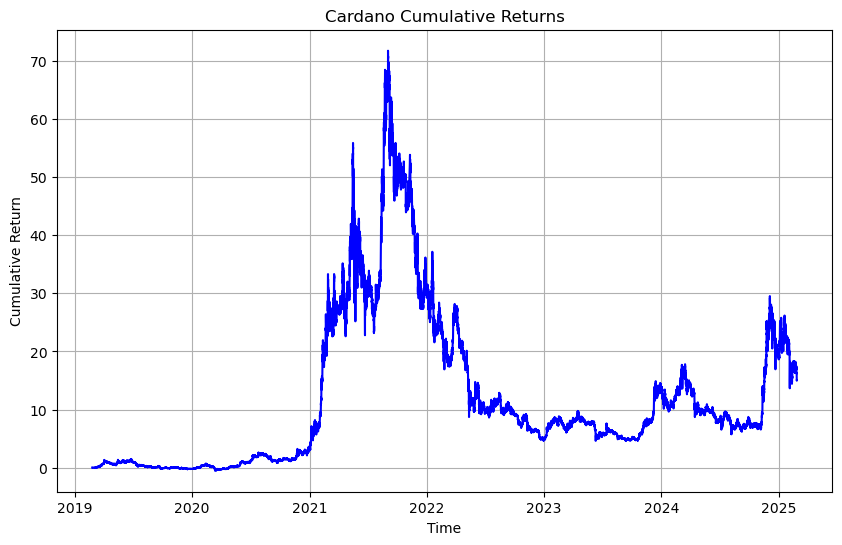

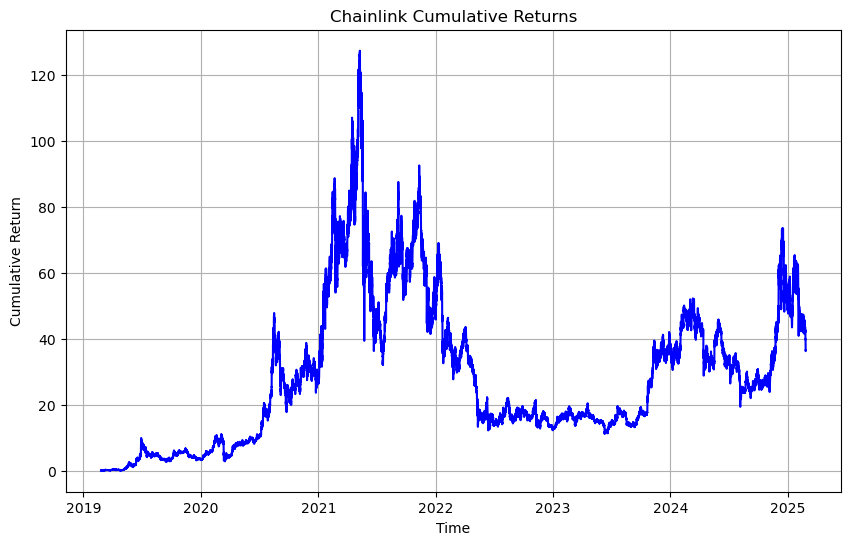

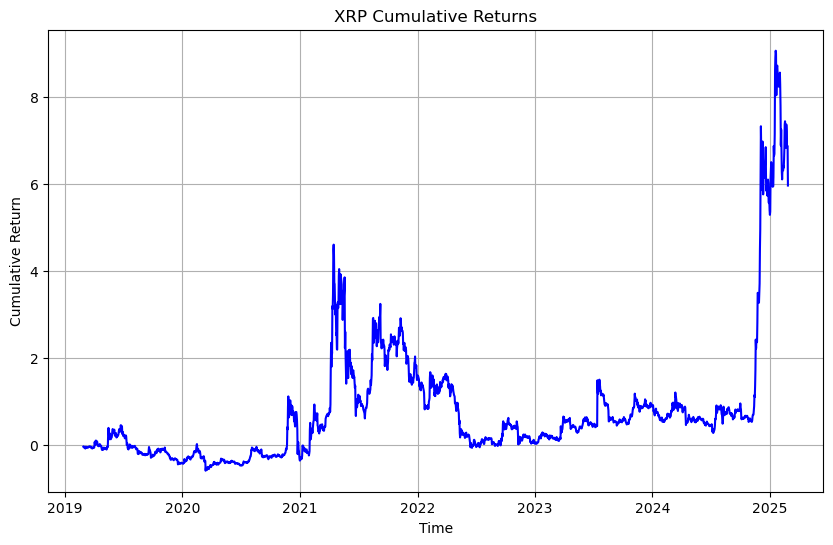

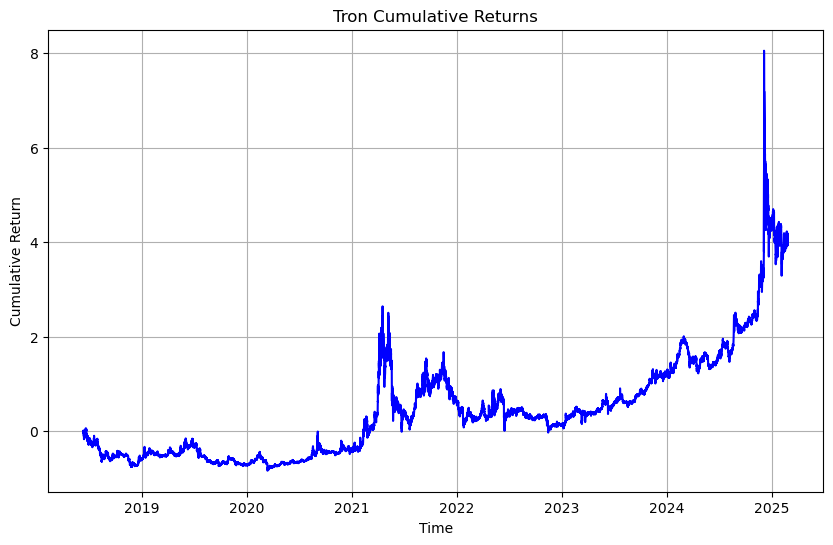

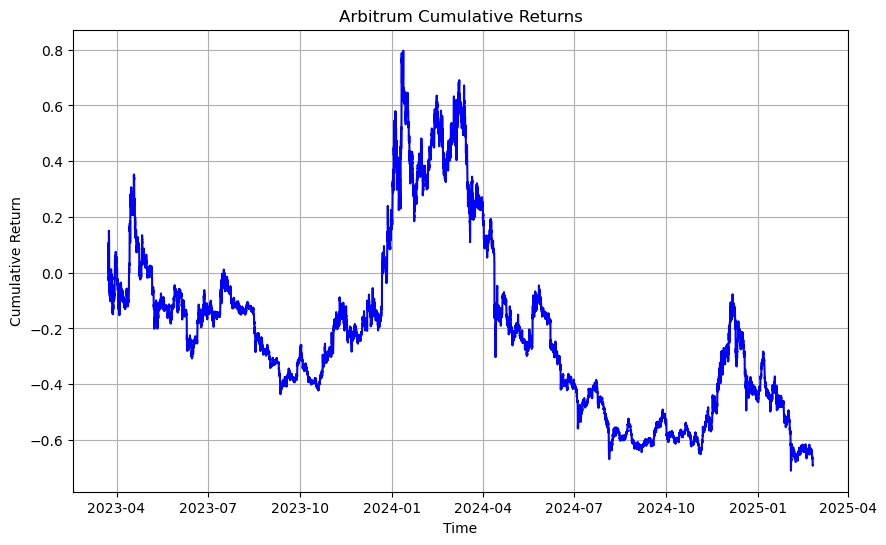

In [12]:
plot_cumulative_return_data(avax_df, "avax", title='Avalanche Cumulative Returns')
plot_cumulative_return_data(btc_df, "btc", title='Bitcoin Cumulative Returns')
plot_cumulative_return_data(eth_df, "eth", title='Ethereum Cumulative Returns')
plot_cumulative_return_data(matic_df, "matic", title='Polygon Cumulative Returns')
plot_cumulative_return_data(sol_df, "sol", title='Solana Cumulative Returns')
plot_cumulative_return_data(bnb_df, "bnb", title='Binance Coin Cumulative Returns')
plot_cumulative_return_data(cardano_df, "cardano", title='Cardano Cumulative Returns')
plot_cumulative_return_data(link_df, "link", title='Chainlink Cumulative Returns')
plot_cumulative_return_data(xrp_df, "xrp", title='XRP Cumulative Returns')
plot_cumulative_return_data(tron_df, "tron", title='Tron Cumulative Returns')
plot_cumulative_return_data(arbitrum_df, "arbitrum", title='Arbitrum Cumulative Returns')

In [13]:
def plot_return_correlations(df, return_columns=None, title='Correlation of Returns', figsize=(10, 8)):

    if return_columns is None:
        return_columns = df.columns
    
    corr_matrix = df[return_columns].corr()
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(title)
    plt.show()

In [52]:
dfs = [
    avax_df[['time', 'avax_return']],
    btc_df[['time', 'btc_return']],
    eth_df[['time', 'eth_return']],
    matic_df[['time', 'matic_return']],
    sol_df[['time', 'sol_return']],
    bnb_df[['time', 'bnb_return']],
    cardano_df[['time', 'cardano_return']],
    link_df[['time', 'link_return']],
    xrp_df[['time', 'xrp_return']],
    tron_df[['time', 'tron_return']],
    arbitrum_df[['time', 'arbitrum_return']],
    bch_df[['time', 'bch_return']]
]

all_returns_df = reduce(lambda left, right: pd.merge(left, right, on='time', how='outer'), dfs)
all_returns_df = all_returns_df.drop('time', axis=1)

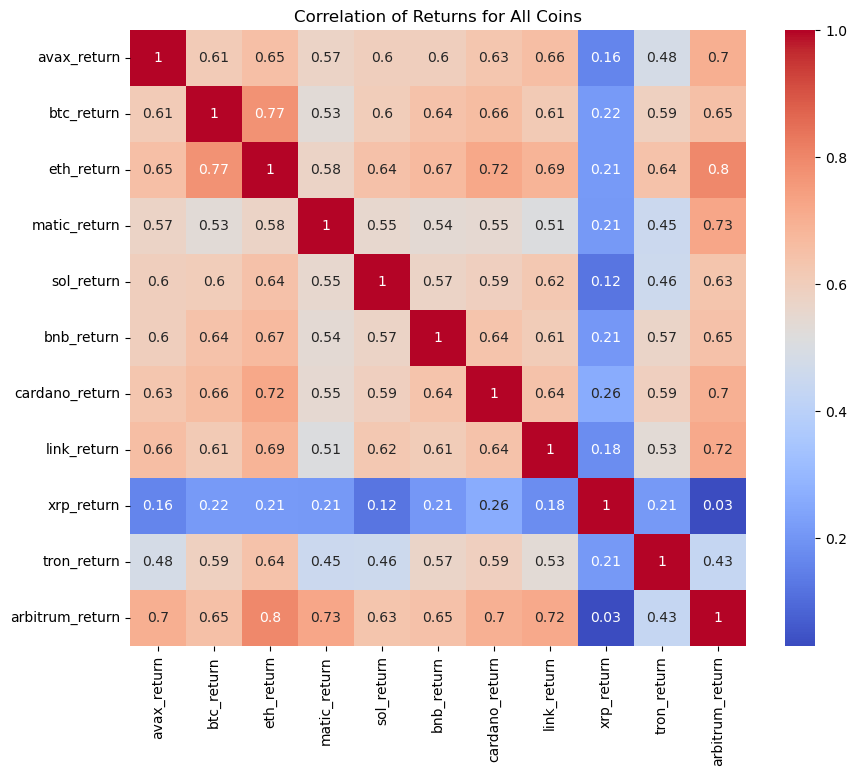

In [15]:
plot_return_correlations(all_returns_df, title='Correlation of Returns for All Coins')

In [16]:
sns.set(style='whitegrid', context='talk')

def fancy_return_histogram(df, return_col, bins=50, title="Return Distribution", figsize=(12,8), color="dodgerblue"):
    plt.figure(figsize=figsize)
    ax = sns.histplot(df[return_col].dropna(), bins=bins, kde=True, stat="density",
                      color=color, edgecolor='black', alpha=0.7)
    sns.rugplot(df[return_col].dropna(), color='black', ax=ax)
    
    mean_val = df[return_col].mean()
    std_val = df[return_col].std()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.4f}")
    ax.axvline(mean_val + std_val, color='green', linestyle='--', linewidth=2, label=f"+1 Std: {(mean_val+std_val):.4f}")
    ax.axvline(mean_val - std_val, color='green', linestyle='--', linewidth=2, label=f"-1 Std: {(mean_val-std_val):.4f}")
    
    ax.legend(fontsize=14)
    ax.set_title(title, fontsize=20, weight='bold')
    ax.set_xlabel("Returns", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    plt.tight_layout()
    plt.show()


def fancy_rolling_volatility(df, return_col, window=24, title="Rolling Volatility", figsize=(12,8), line_color="darkorange"):
    df = df.copy()
    df["rolling_volatility"] = df[return_col].rolling(window=window).std()
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.plot(df.index, df["rolling_volatility"], color=line_color, linewidth=2, label=f"{window}-Period Volatility")
    
    max_vol = df["rolling_volatility"].max()
    max_date = df["rolling_volatility"].idxmax()
    ax.annotate(f'Max Vol: {max_vol:.4f}', xy=(max_date, max_vol), xytext=(max_date, max_vol*1.1),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                fontsize=12, color='black')
    
    ax.set_title(title, fontsize=20, weight='bold')
    ax.set_xlabel("Time", fontsize=16)
    ax.set_ylabel("Volatility", fontsize=16)
    ax.legend(fontsize=14)
    plt.tight_layout()
    plt.show()


def fancy_return_acf(df, return_col, lags=20, title="Autocorrelation of Returns", 
                     figsize=(12,8), alpha=0.05, show_zero_lag=False, ylim=(-0.2, 0.2)):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    plot_acf(df[return_col].dropna(), 
             lags=lags, 
             alpha=alpha, 
             ax=ax, 
             zero=show_zero_lag)
    
    if ylim is not None:
        ax.set_ylim(ylim)
    
    ax.set_title(title, fontsize=20, weight='bold')
    ax.set_xlabel("Lags", fontsize=16)
    ax.set_ylabel("Autocorrelation", fontsize=16)
    plt.tight_layout()
    plt.show()



def fancy_return_qq(df, return_col, title="Q-Q Plot of Returns", figsize=(10,8)):
    plt.figure(figsize=figsize)
    qq = sm.qqplot(df[return_col].dropna(), line='s', alpha=0.5)
    plt.title(title, fontsize=20, weight='bold')
    plt.xlabel("Theoretical Quantiles", fontsize=16)
    plt.ylabel("Sample Quantiles", fontsize=16)
    plt.tight_layout()
    plt.show()

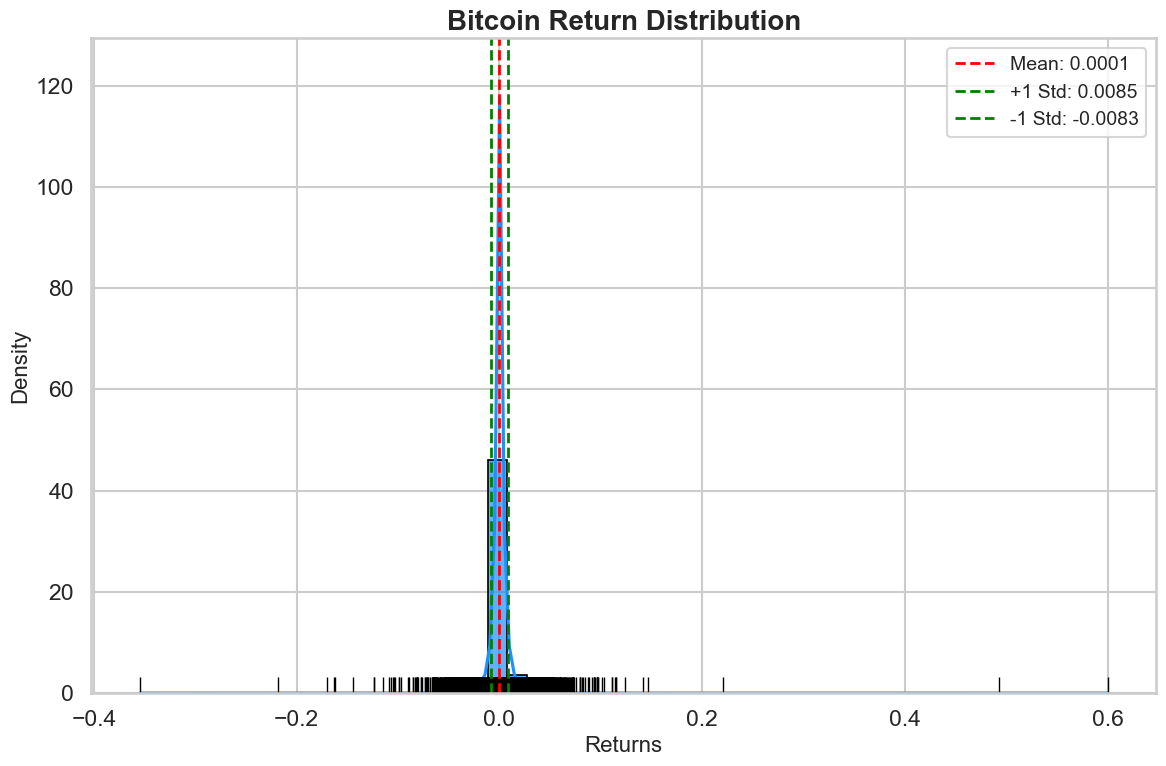

In [17]:
fancy_return_histogram(all_returns_df, "btc_return", title="Bitcoin Return Distribution")

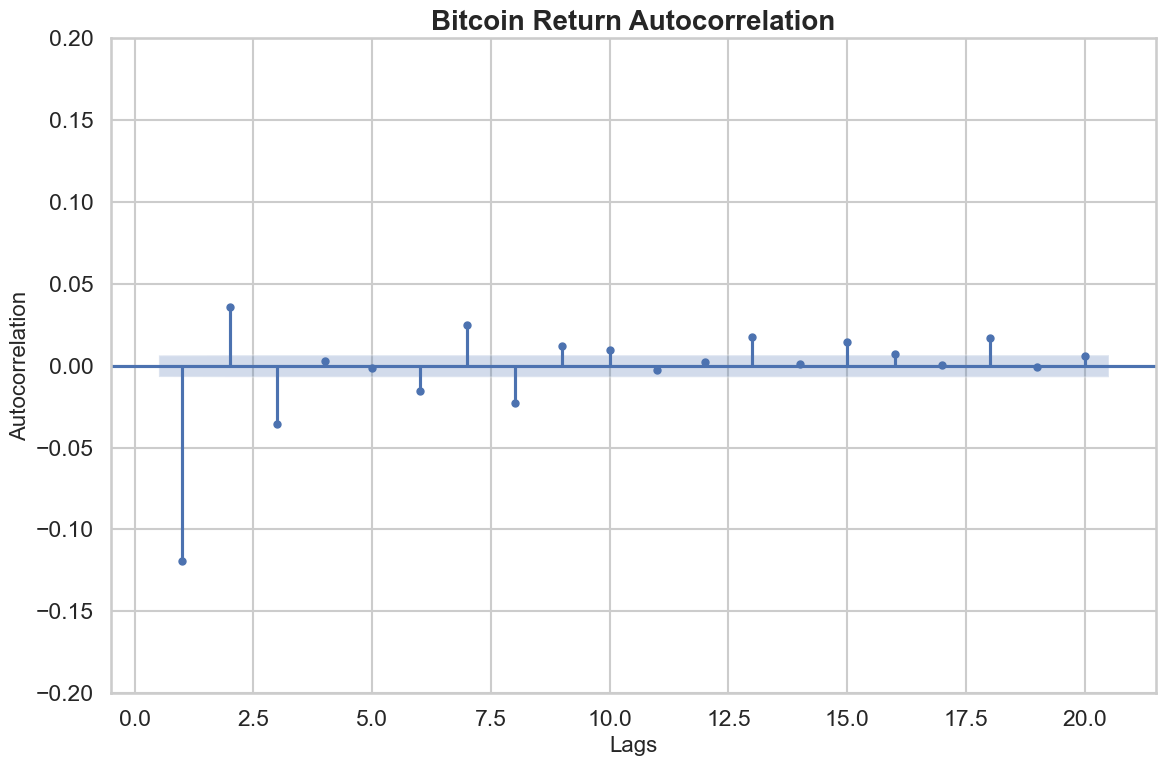

In [18]:
fancy_return_acf(all_returns_df, "btc_return", title="Bitcoin Return Autocorrelation")

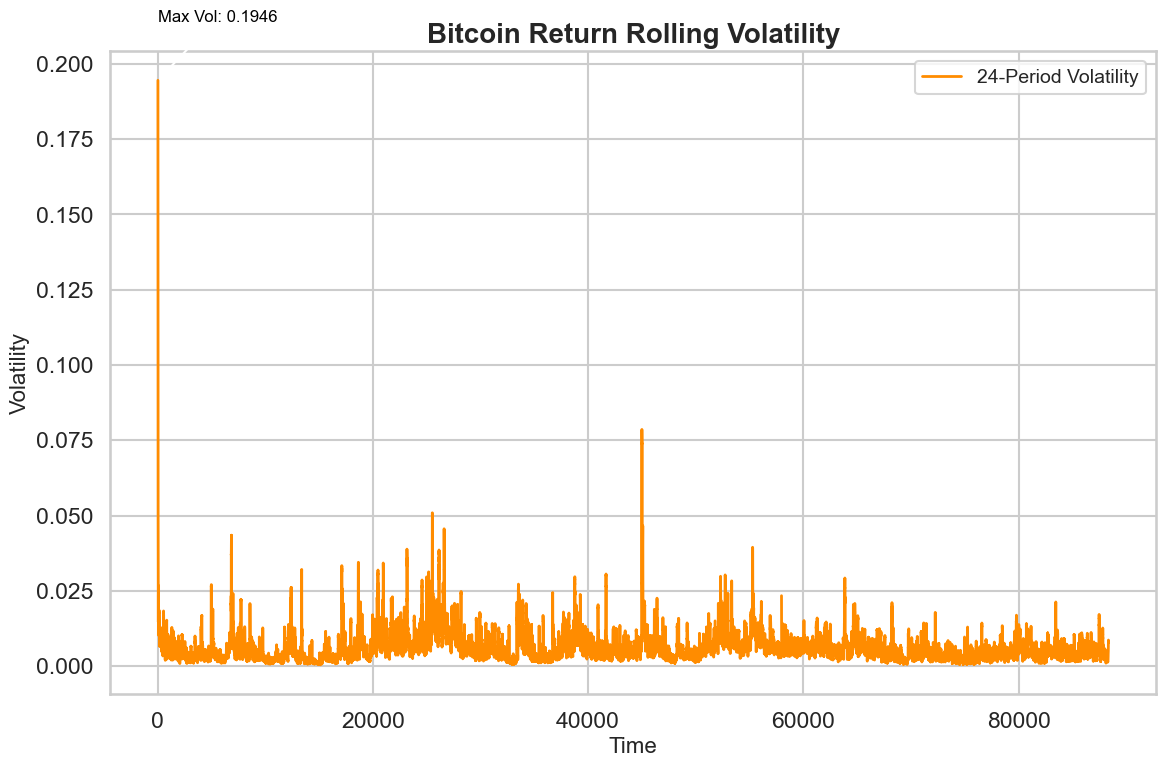

In [19]:
fancy_rolling_volatility(all_returns_df, "btc_return", title="Bitcoin Return Rolling Volatility")

<Figure size 1000x800 with 0 Axes>

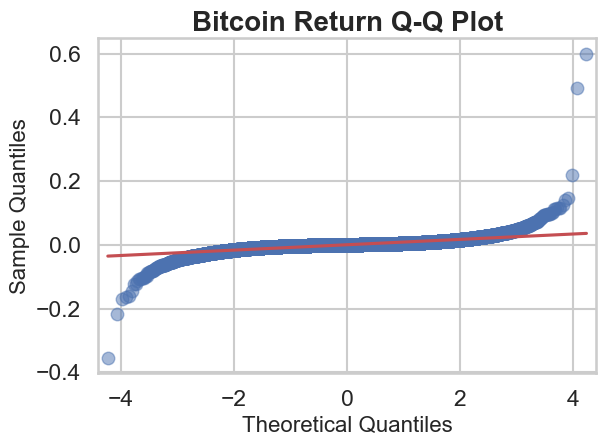

In [20]:
fancy_return_qq(all_returns_df, "btc_return", title="Bitcoin Return Q-Q Plot")

BTC On-Chain

In [21]:
df_BTC_On_Chain = pd.read_parquet('../Parquet_Data/BTC_Hourly_On_Chain_Data_sorted.parquet')

In [22]:
df_BTC_On_Chain.head()

,hour,average_height,average_difficulty,average_total_fees,average_total_reward,average_mint_reward,average_transaction_count,average_nonce,average_size,average_stripped_size,average_version,average_weight
3417,2015-01-01 00:00:00.000 UTC,336868.0,4.064096e+10,0.023508,25.023508,25.0,177.733333,1.982945e+09,103153.666667,103153.666667,2.0,4.126147e+05
32629,2015-01-01 01:00:00.000 UTC,336879.0,4.064096e+10,0.043085,25.043085,25.0,309.571429,2.230371e+09,168577.857143,168577.857143,2.0,6.743114e+05
49123,2015-01-01 02:00:00.000 UTC,336886.5,4.064096e+10,0.029944,25.029944,25.0,228.750000,2.312130e+09,155578.500000,155578.500000,2.0,6.223140e+05
45019,2015-01-01 03:00:00.000 UTC,336892.5,4.064096e+10,0.074818,25.074818,25.0,497.000000,1.882359e+09,257693.000000,257693.000000,2.0,1.030772e+06
18681,2015-01-01 04:00:00.000 UTC,336898.0,4.064096e+10,0.032928,25.032928,25.0,246.571429,2.118612e+09,130498.571429,130498.571429,2.0,5.219943e+05


In [23]:
df_BTC_On_Chain_clean = df_BTC_On_Chain.copy()

df_BTC_On_Chain_clean['hour'] = df_BTC_On_Chain_clean['hour'].str.replace(' UTC', '', regex=False)
df_BTC_On_Chain_clean['hour'] = pd.to_datetime(df_BTC_On_Chain_clean['hour'])

df_BTC_On_Chain_clean.set_index('hour', inplace=True)
df_BTC_On_Chain_clean.sort_index(inplace=True)

print(df_BTC_On_Chain_clean.info())
print(df_BTC_On_Chain_clean.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88744 entries, 2015-01-01 00:00:00 to 2025-02-23 23:00:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   average_height             88744 non-null  float64
 1   average_difficulty         88744 non-null  float64
 2   average_total_fees         88744 non-null  float64
 3   average_total_reward       88744 non-null  float64
 4   average_mint_reward        88744 non-null  float64
 5   average_transaction_count  88744 non-null  float64
 6   average_nonce              88744 non-null  float64
 7   average_size               88744 non-null  float64
 8   average_stripped_size      88744 non-null  float64
 9   average_version            88744 non-null  float64
 10  average_weight             88744 non-null  float64
dtypes: float64(11)
memory usage: 8.1 MB
None
                     average_height  average_difficulty  average_total_fees  \
hou

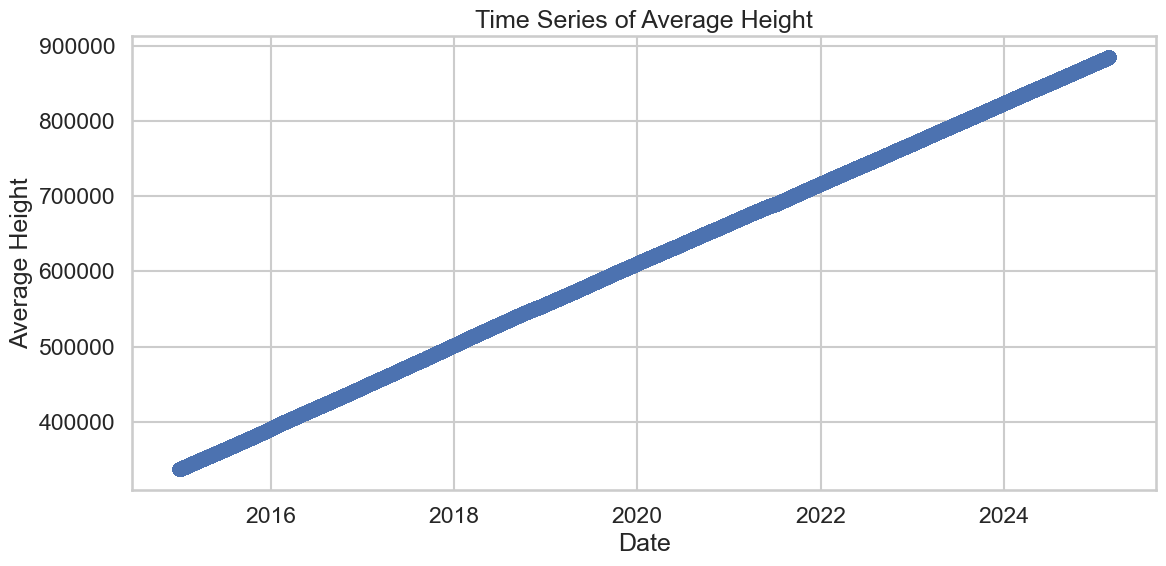

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df_BTC_On_Chain_clean.index, df_BTC_On_Chain_clean['average_height'], marker='o', linestyle='-')
plt.title('Time Series of Average Height')
plt.xlabel('Date')
plt.ylabel('Average Height')
plt.grid(True)
plt.tight_layout()
plt.show()

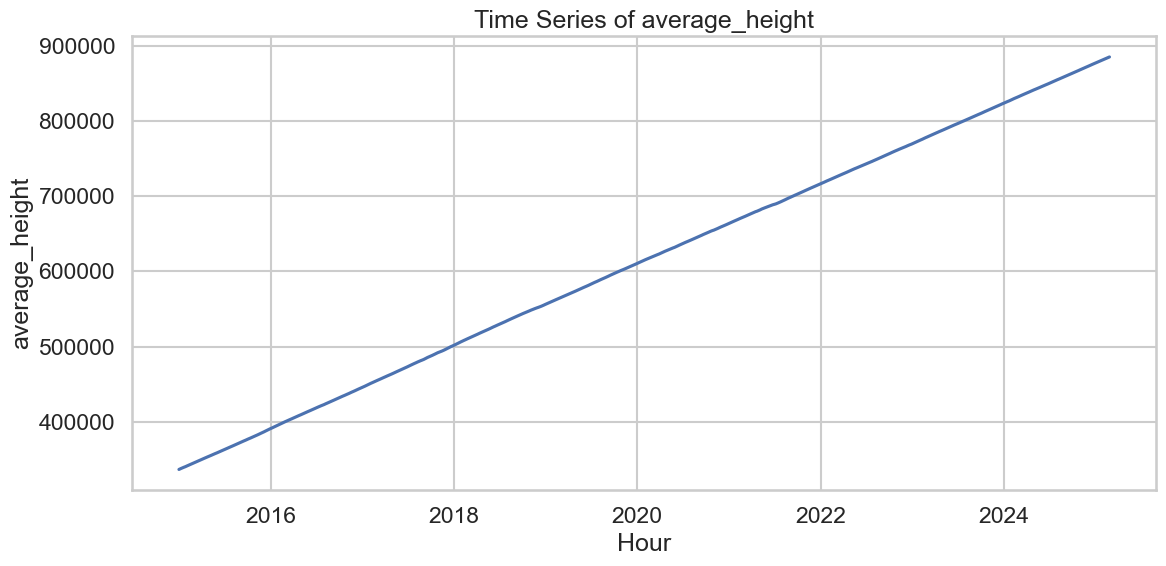

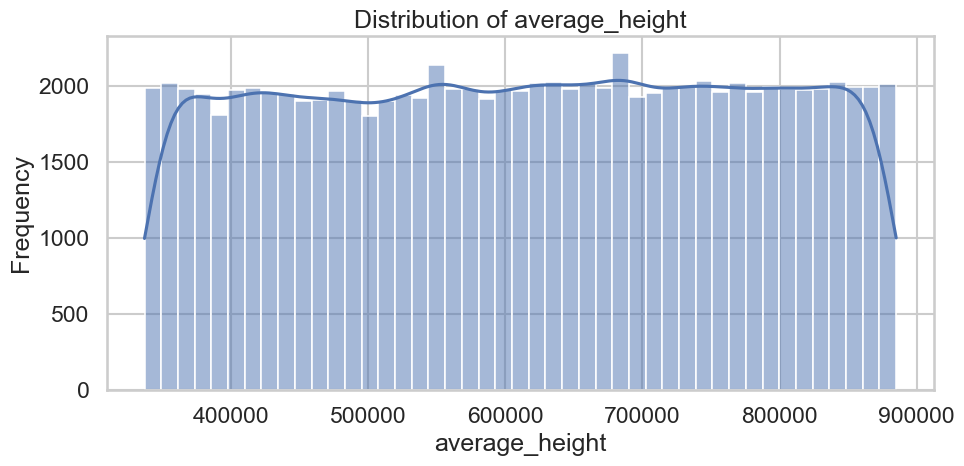

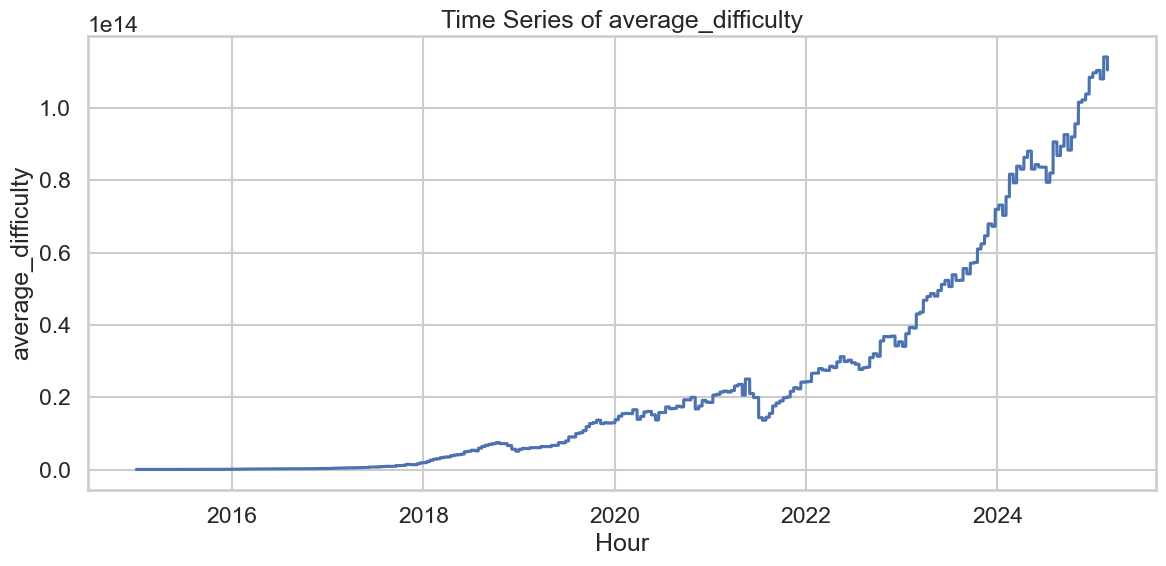

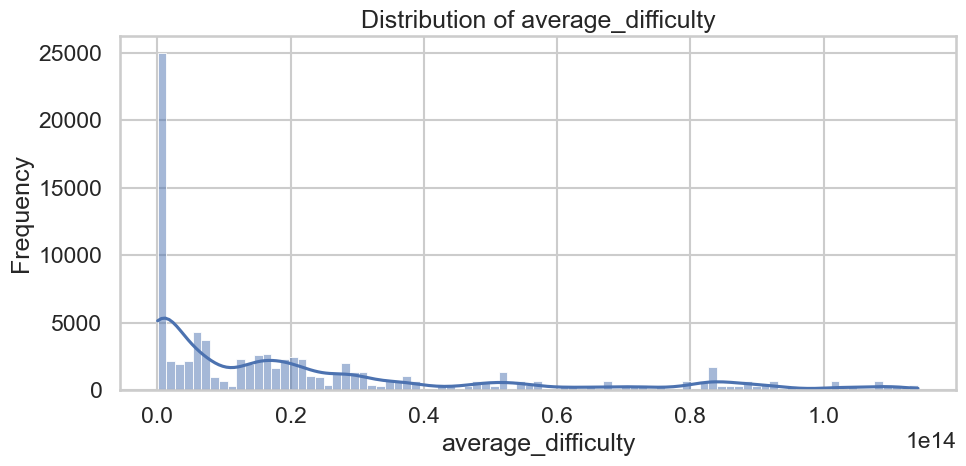

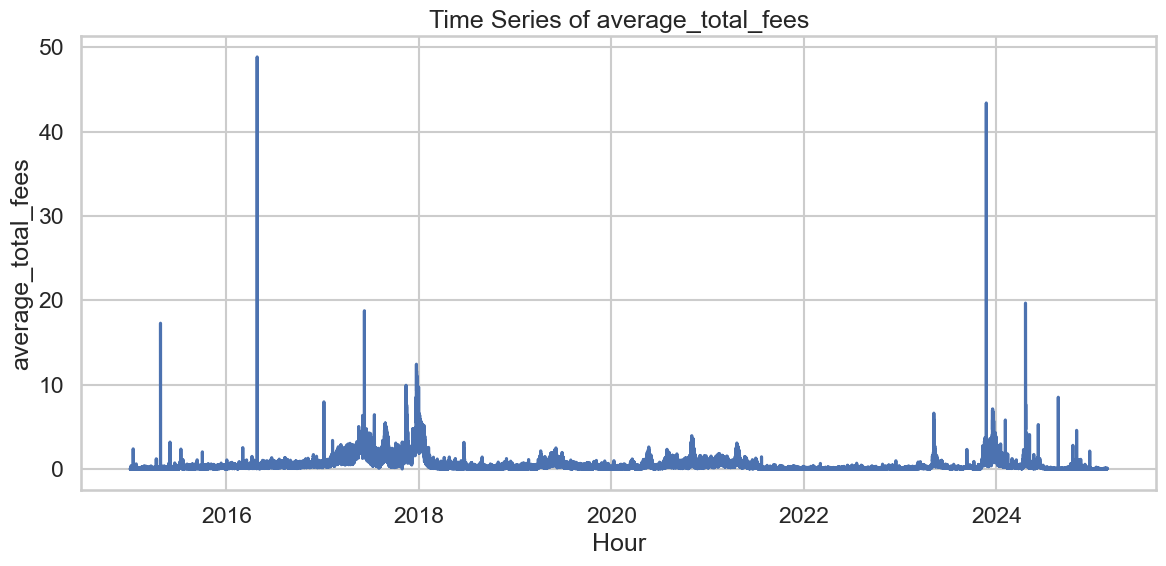

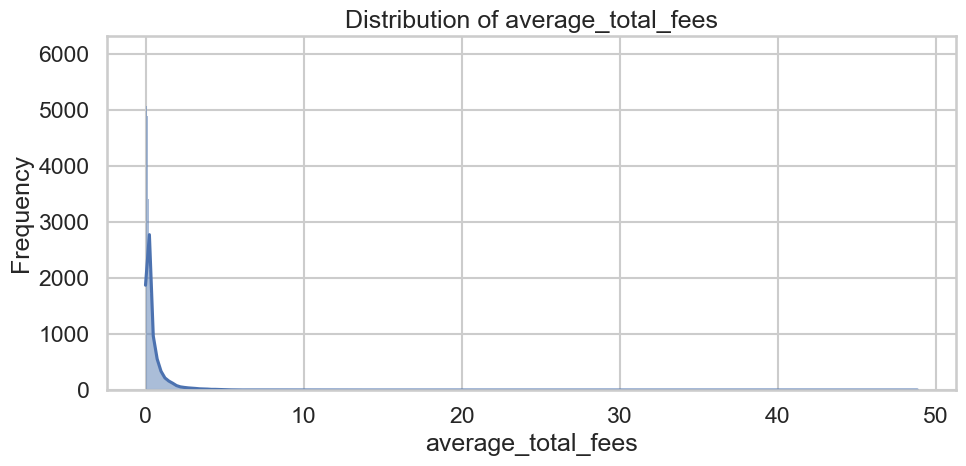

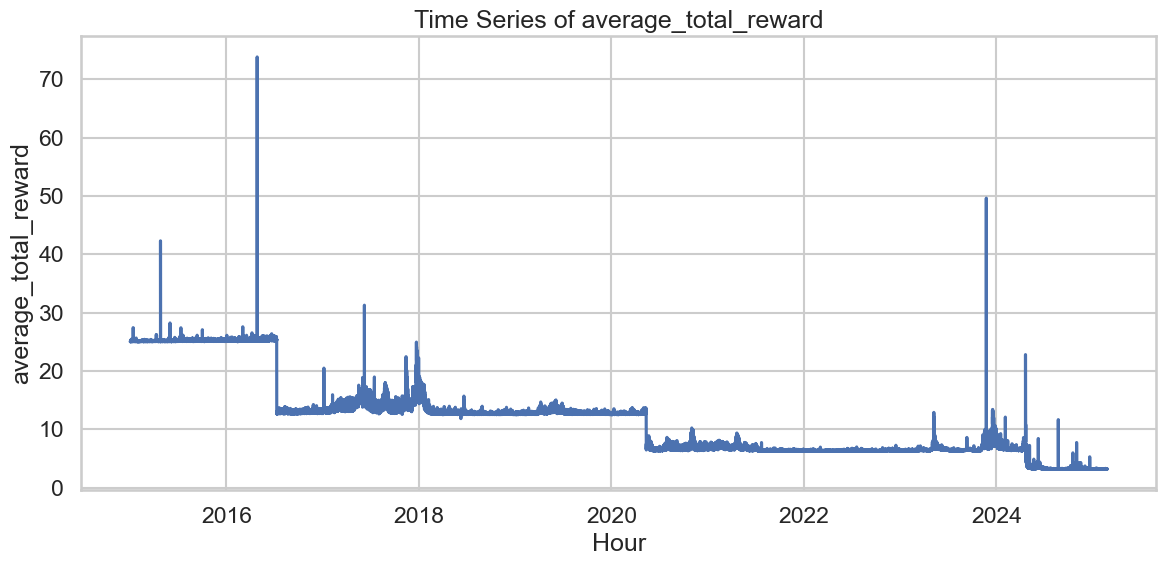

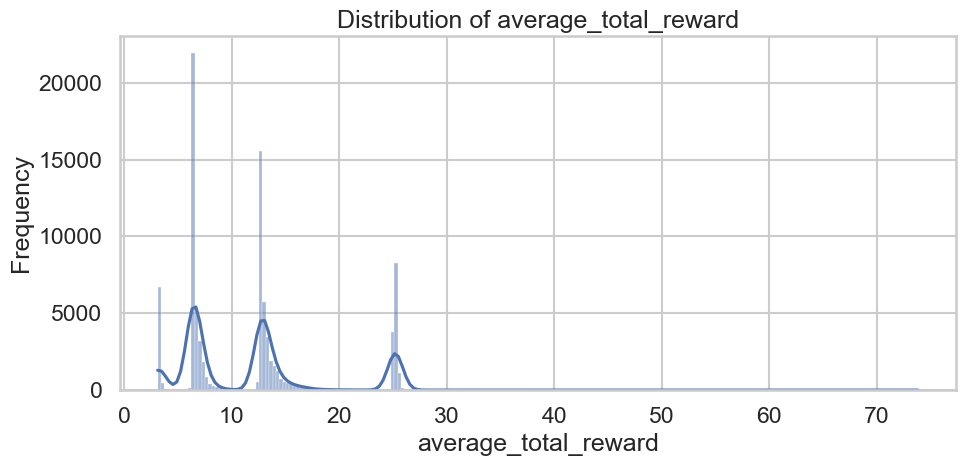

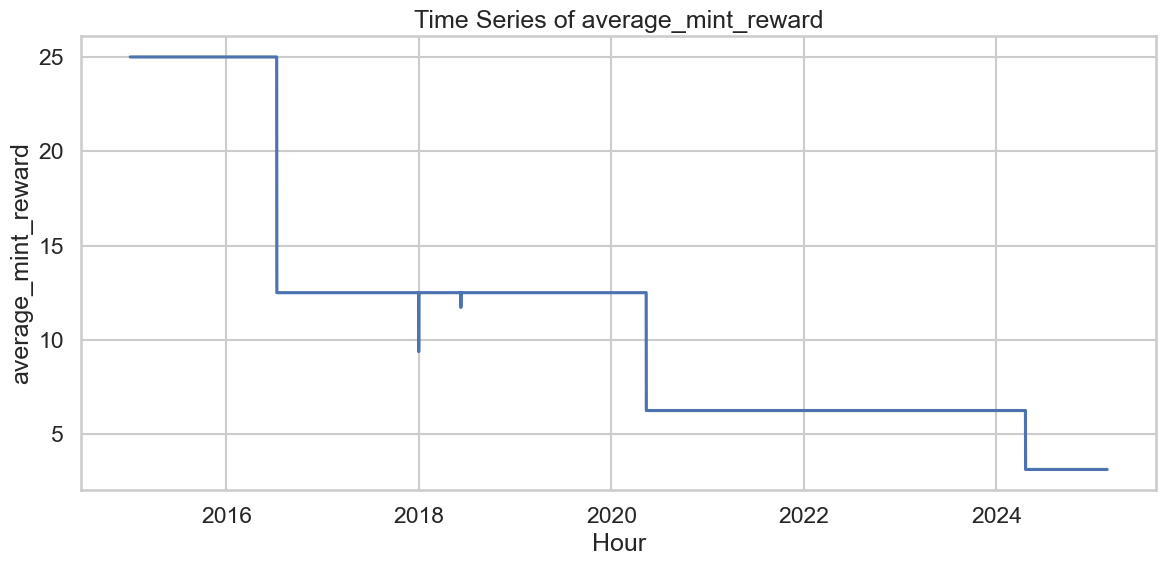

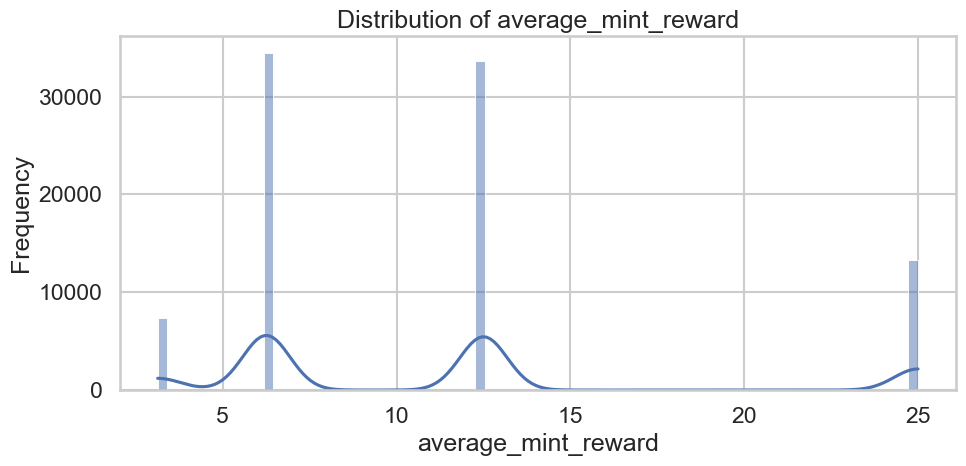

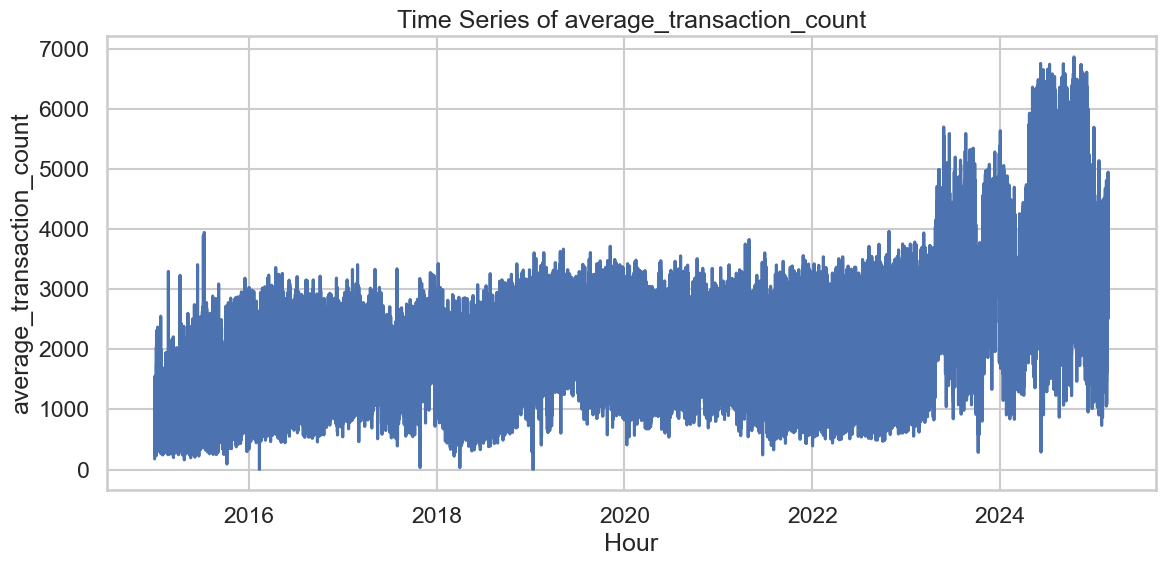

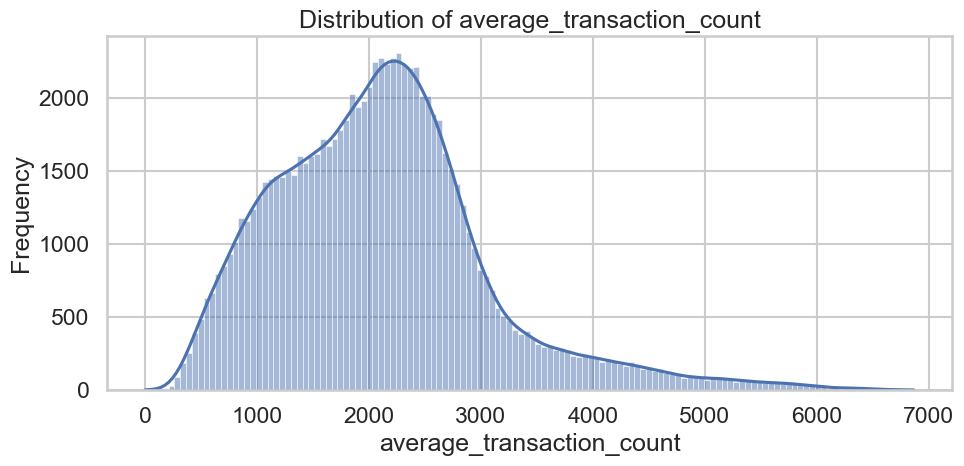

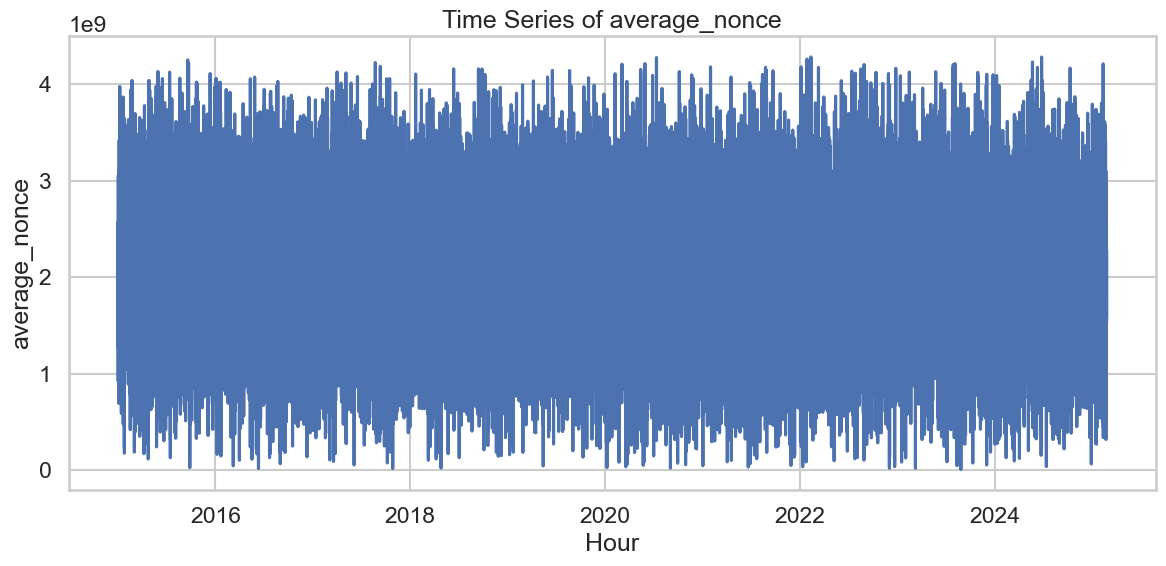

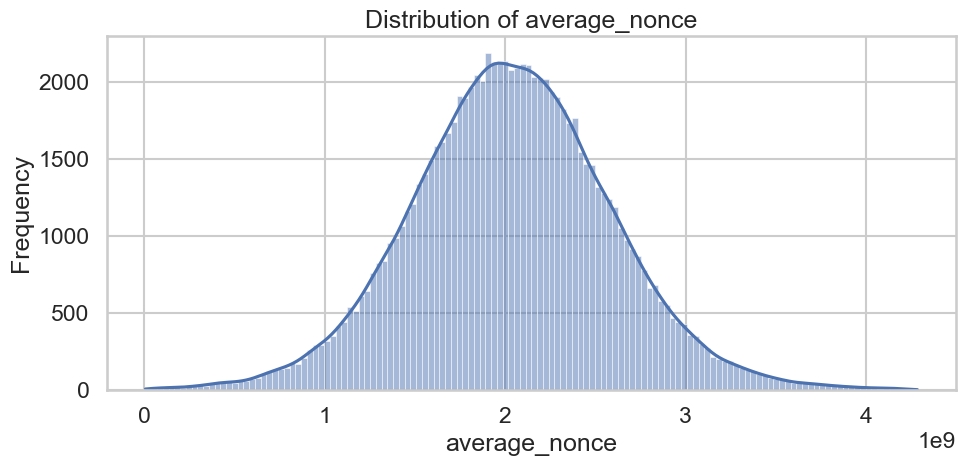

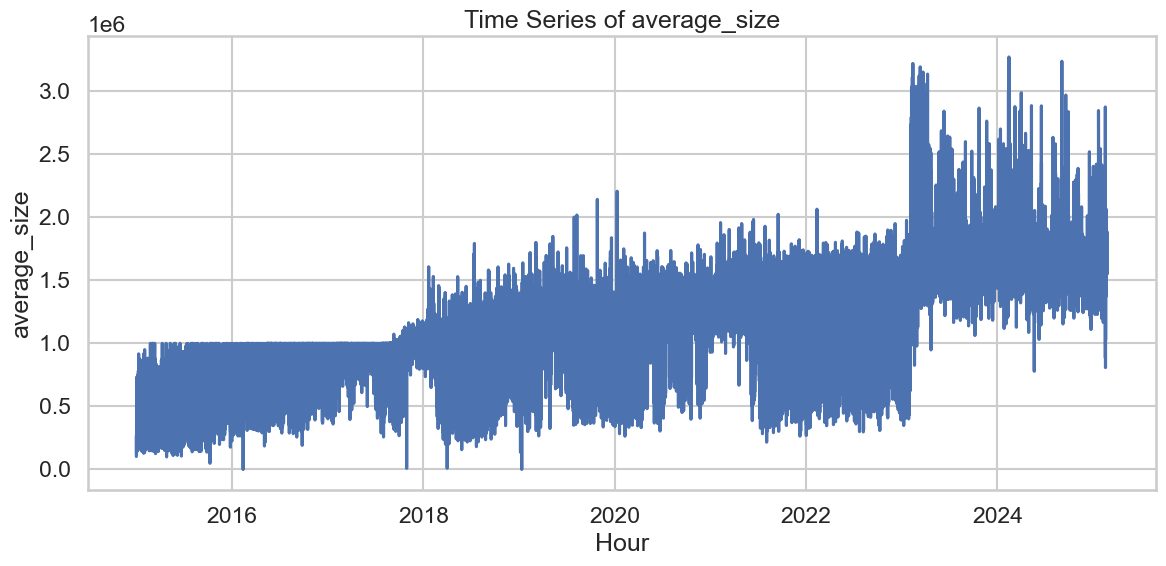

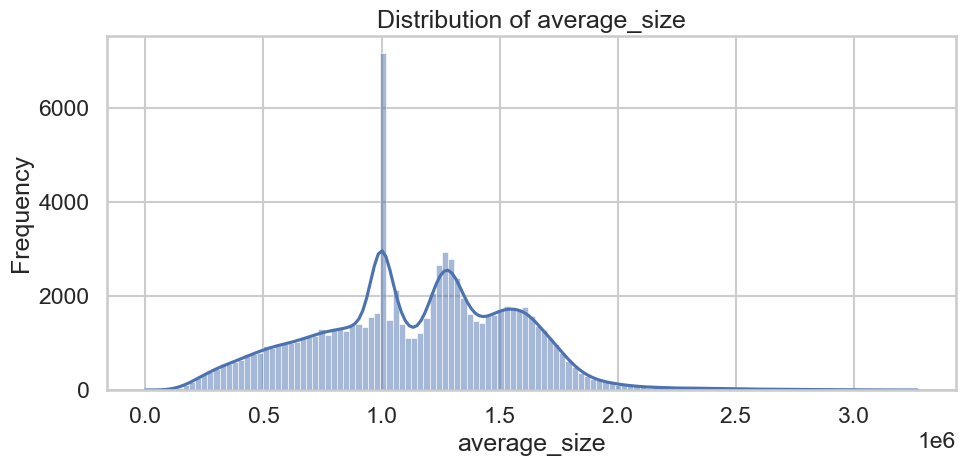

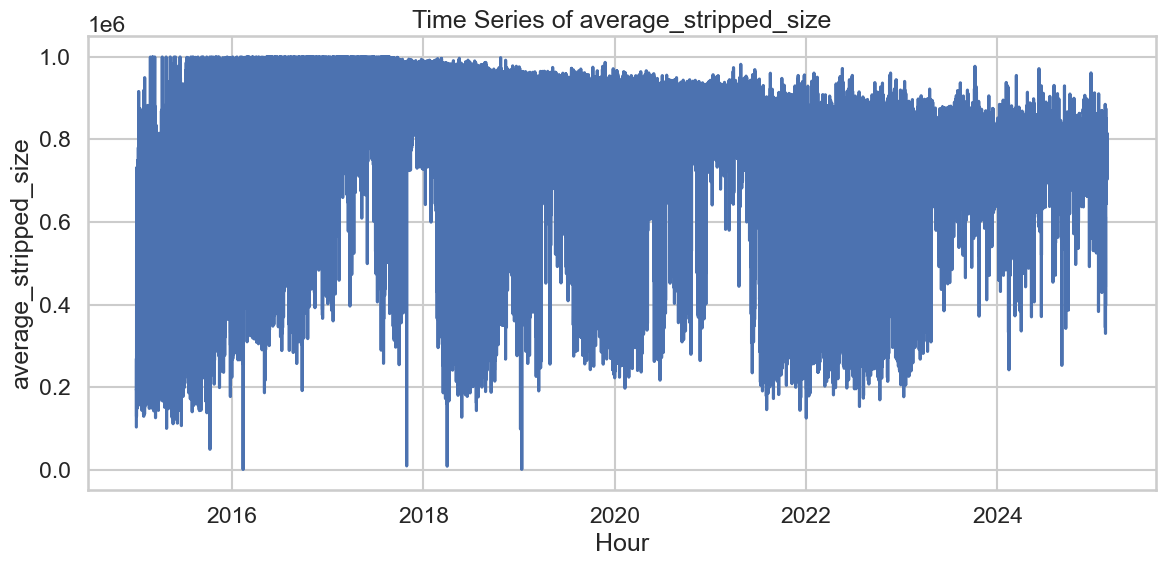

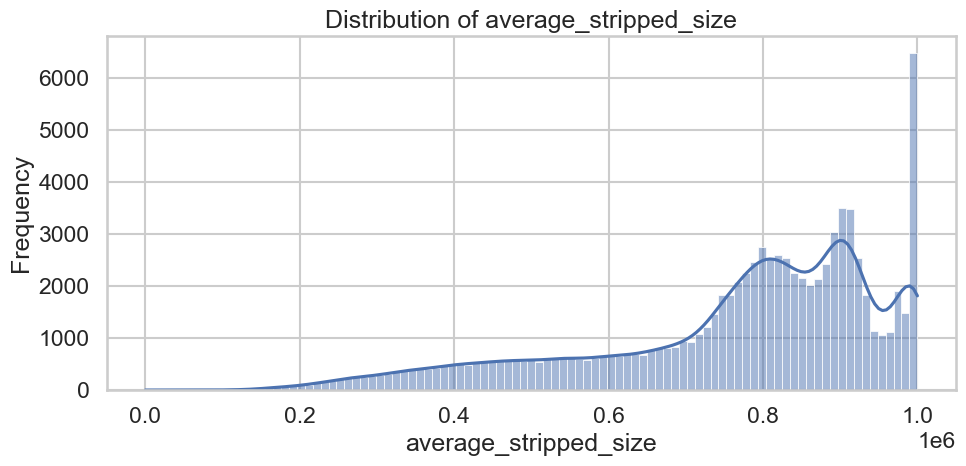

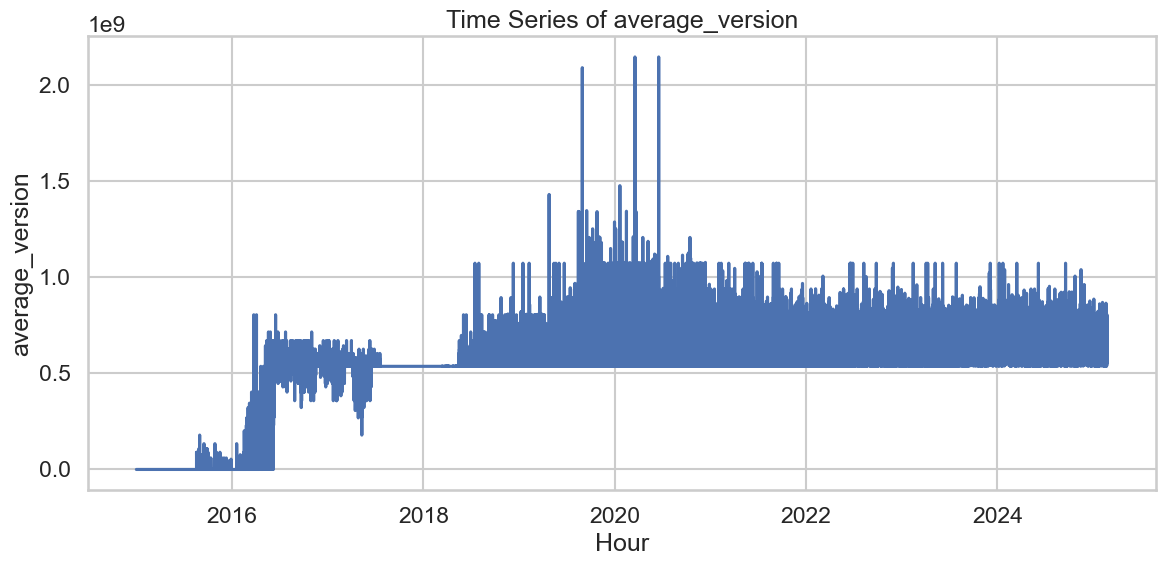

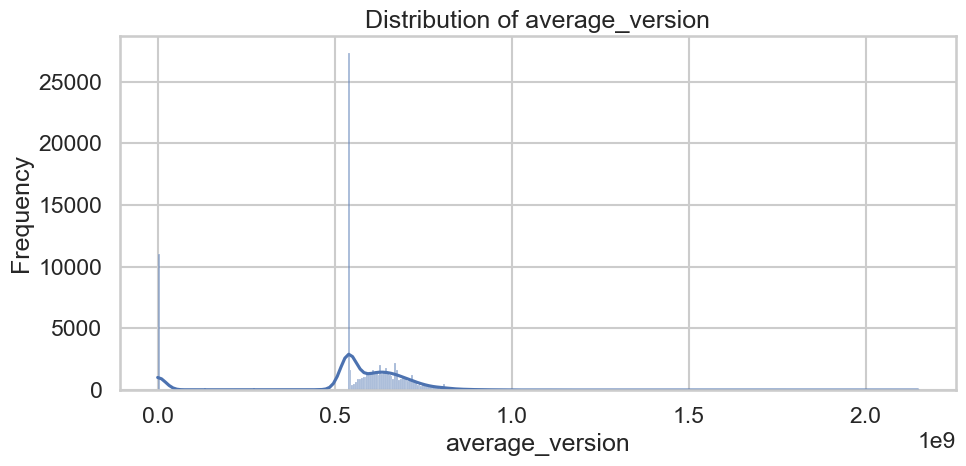

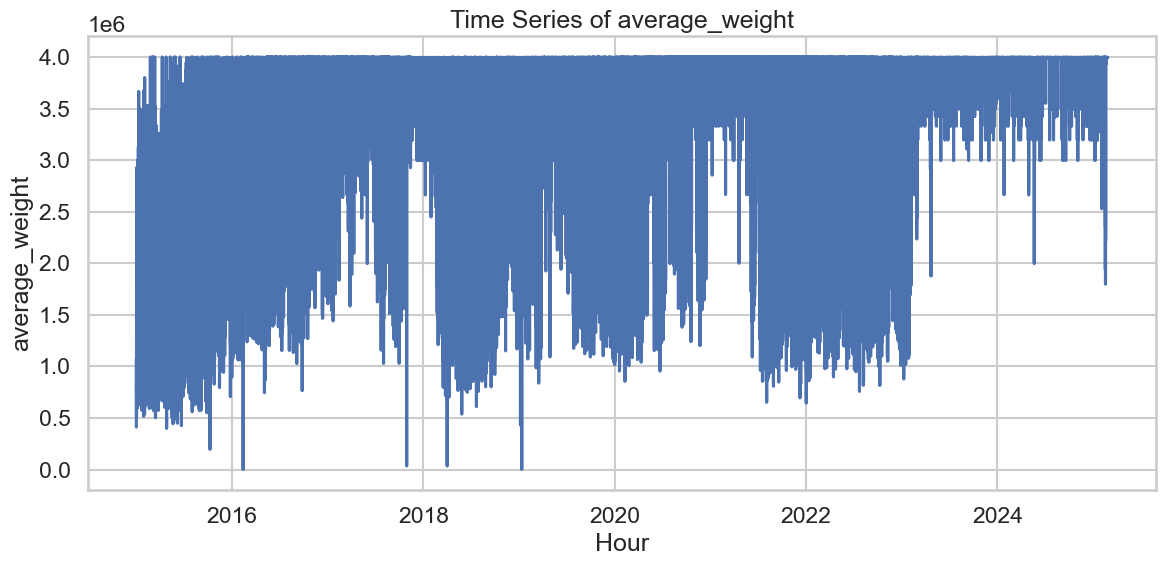

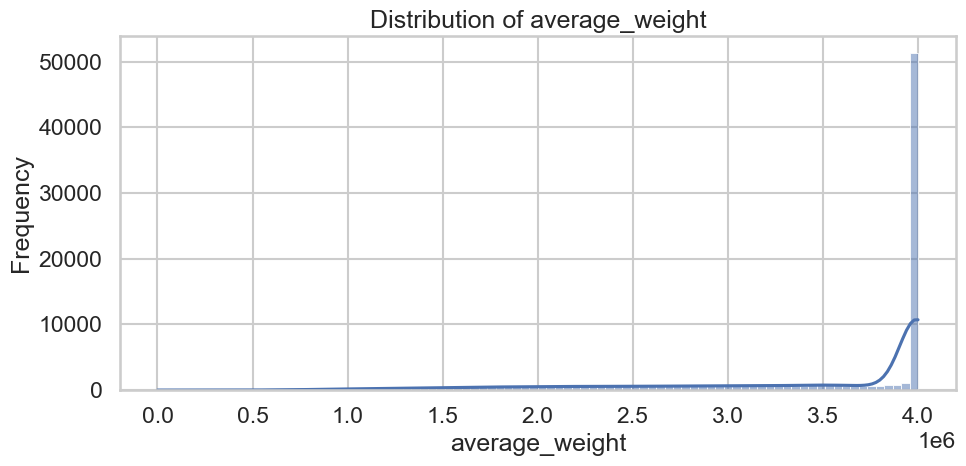

In [25]:
metrics = [col for col in df_BTC_On_Chain_clean.columns if col != 'hour']

for col in metrics:
    plt.figure(figsize=(12, 6))
    plt.plot(df_BTC_On_Chain_clean.index, df_BTC_On_Chain_clean[col], linestyle='-')
    plt.title(f'Time Series of {col}')
    plt.xlabel('Hour')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(df_BTC_On_Chain_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [26]:
ARB_OC = pd.read_parquet('../Parquet_Data/ARB_Hourly_On_Chain_Data_sorted.parquet')
ETH_OC = pd.read_parquet('../Parquet_Data/ETH_Hourly_On_Chain_Data_sorted.parquet')
AVA_OC = pd.read_parquet('../Parquet_Data/query_result_AVALANCHE.parquet')
BNB_OC = pd.read_parquet('../Parquet_Data/query_result_BNB.parquet')
MATIC_OC = pd.read_parquet('../Parquet_Data/query_result_MATIC.parquet')
SOL_OC = pd.read_parquet('../Parquet_Data/query_result_SOL.parquet')
TRON_OC = pd.read_parquet('../Parquet_Data/TRON_Hourly_On_Chain_Data_sorted.parquet')

In [27]:
def fill_missing_with_neighbor_average(df):
    # Replace string '<nil>' with actual NaN values
    df = df.replace('<nil>', np.nan)
    
    # For numeric columns, fill missing values using the average of the previous and next values
    # Note: This method will work best if missing values are isolated (i.e. not in consecutive rows)
    df_filled = df.apply(lambda col: col.fillna((col.shift(1) + col.shift(-1)) / 2)
                         if pd.api.types.is_numeric_dtype(col) else col)
    return df_filled

In [28]:
parquet_files = {
    'ARB_OC': '../Parquet_Data/ARB_Hourly_On_Chain_Data_sorted.parquet',
    'ETH_OC': '../Parquet_Data/ETH_Hourly_On_Chain_Data_sorted.parquet',
    'AVA_OC': '../Parquet_Data/query_result_AVALANCHE.parquet',
    'BNB_OC': '../Parquet_Data/query_result_BNB.parquet',
    'MATIC_OC': '../Parquet_Data/query_result_MATIC.parquet',
    'SOL_OC': '../Parquet_Data/query_result_SOL.parquet',
    'TRON_OC': '../Parquet_Data/TRON_Hourly_On_Chain_Data_sorted.parquet'
}

# Dictionary to store the resulting DataFrames
dataframes_dict = {}

# Loop through each file, load the Parquet, and create one DataFrame per column
for file_key, file_path in parquet_files.items():
    # Read the Parquet file
    df = pd.read_parquet(file_path)
    
    # For each column, create a one-column DataFrame and store in the dictionary
    for col in df.columns:
        single_col_df = df[[col]].copy()  # copy is optional, but good practice
        # Store it using a unique key
        dataframes_dict[f"{file_key}_{col}"] = single_col_df

# Example: Access the DataFrame for "average_number" column in ARB_OC
example_df = dataframes_dict['ARB_OC_average_number']
example_df

,average_number
19083,2.0
12034,13.5
1589,25.5
14425,27.0
6727,28.0
...,...
28340,309162771.0
8864,309176782.0
29803,309190659.5
6688,309204457.5


In [29]:
coins = ['ARB_OC', 'ETH_OC', 'AVA_OC', 'BNB_OC', 'MATIC_OC', 'TRON_OC']

# List to store the individual average_number DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_number"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_number': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_number_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_number_all = pd.DataFrame()
df_average_number_all = fill_missing_with_neighbor_average(df_average_number_all)
print(df_average_number_all.head())

       ARB_OC      ETH_OC      AVA_OC      BNB_OC    MATIC_OC     TRON_OC
19083     2.0   3584932.0  25068039.0  13124714.0    441601.5  31981923.0
12034    13.5  14783651.5   2821865.0   2465230.5  19769252.5  22442366.5
1589     25.5  12731086.0   2912909.5  18105725.5  35724673.5  11229481.5
14425    27.0  10360210.0  47737248.0  25471086.5  19335890.5  50221458.5
6727     28.0  12925919.5  47972612.5   8053387.5  17884357.5  27964272.0


In [30]:
coins = ['ARB_OC', 'ETH_OC', 'AVA_OC', 'BNB_OC', 'MATIC_OC', 'TRON_OC']

# List to store the individual average_gas_limit DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_gas_limit"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_gas_limit': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_gas_limit_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_gas_limit_all = pd.DataFrame()
df_average_gas_limit_all = fill_missing_with_neighbor_average(df_average_gas_limit_all)
print(df_average_gas_limit_all.head())

            ARB_OC    ETH_OC      AVA_OC       BNB_OC    MATIC_OC  \
19083  287985032.0   4269074   8000000.0   87370472.0  20000000.0   
12034  287980436.0  30009183   8000000.0   30000000.0  20522712.0   
1589   287996529.0  14986262   8000000.0   96653506.0  22693619.0   
14425  287996529.0  11842145  15000000.0  139502078.0  20382091.0   
6727   287996529.0  14982927  15000000.0   59967925.0  20100088.0   

            TRON_OC  
19083  4.353143e+09  
12034  1.356395e+10  
1589   5.377599e+09  
14425  8.655398e+09  
6727   3.908608e+09  


In [31]:
coins = ['ARB_OC', 'ETH_OC', 'AVA_OC', 'BNB_OC', 'MATIC_OC', 'TRON_OC']

# List to store the individual average_gas_used DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_gas_used"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_gas_used': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_gas_used_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_gas_used_all = pd.DataFrame()
df_average_gas_used_all = fill_missing_with_neighbor_average(df_average_gas_used_all)
print(df_average_gas_used_all.head())

       ARB_OC    ETH_OC    AVA_OC      BNB_OC    MATIC_OC    TRON_OC
19083   121.0    788741  840562.0  56226910.0         0.0  1115722.0
12034  5473.0  15539533  184409.0    348630.0  19291751.0  2955493.0
1589     69.0  14634573  177365.0  25231481.0  11433708.0  3898929.0
14425     0.0  11219874  561691.0  11841457.0  19049619.0  3720650.0
6727      0.0  14781387  648276.0  18398711.0  16827815.0  1156742.0


In [32]:
coins = ['ARB_OC', 'ETH_OC', 'AVA_OC', 'BNB_OC', 'MATIC_OC', 'TRON_OC']

# List to store the individual average_difficulty DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_difficulty"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_difficulty': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_difficulty_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_difficulty_all = pd.DataFrame()

df_average_difficulty_all = fill_missing_with_neighbor_average(df_average_difficulty_all)

print(df_average_difficulty_all.head())

       ARB_OC        ETH_OC  AVA_OC    BNB_OC   MATIC_OC  TRON_OC
19083     0.0  2.971066e+14     1.0  1.978796   7.000000      0.0
12034     0.0  1.433116e+16     1.0  1.994992  18.979301      0.0
1589      0.0  6.297328e+15     1.0  1.997496  22.000000      0.0
14425     0.0  2.416984e+15     1.0  1.995812  14.907500      0.0
6727      0.0  6.924245e+15     1.0  2.000000  13.860236      0.0


In [33]:
coins = ['ARB_OC', 'ETH_OC', 'AVA_OC', 'BNB_OC', 'MATIC_OC', 'TRON_OC']

# List to store the individual average_total_difficulty DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_total_difficulty"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_total_difficulty': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_total_difficulty_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_total_difficulty_all = pd.DataFrame()

df_average_total_difficulty_all = fill_missing_with_neighbor_average(df_average_total_difficulty_all)

print(df_average_total_difficulty_all.head())

       ARB_OC                   ETH_OC      AVA_OC      BNB_OC     MATIC_OC  \
19083     0.0    222492977578326978270  25068039.0  26074027.0    3091212.0   
12034     0.0  49088689596702702899346   2821865.0   4929061.0  228766932.0   
1589      0.0  26897520074785231184104   2912910.0  35990322.0  557022176.0   
14425     0.0  16104402646080964156904  47737248.0  50622467.0  221830095.0   
6727      0.0  28203984738459130054663  47972613.0  16047378.0  198187864.0   

       TRON_OC  
19083      0.0  
12034      0.0  
1589       0.0  
14425      0.0  
6727       0.0  


In [34]:
coins = ['ARB_OC', 'ETH_OC', 'AVA_OC', 'BNB_OC', 'MATIC_OC', 'TRON_OC']

# List to store the individual average_size DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_size"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_size': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_size_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_size_all = pd.DataFrame()

df_average_size_all = fill_missing_with_neighbor_average(df_average_size_all)

print(df_average_size_all.head())

           ARB_OC        ETH_OC       AVA_OC         BNB_OC       MATIC_OC  \
19083  689.000000   3993.595142  2485.427930  113805.132316     614.345361   
12034  833.227273  81785.711111   885.812357    1496.924040  103509.227038   
1589   790.000000  59700.103586   880.935673   53768.363105   47309.613975   
14425  889.000000  34388.903346  2083.850615   30317.471524   75305.626250   
6727   890.000000  62429.400000  2518.820733   46011.622500   67384.333990   

            TRON_OC  
19083  47711.673895  
12034  13898.398333  
1589   57633.694958  
14425  94898.919167  
6727   20600.033361  


In [35]:
coins = ['ARB_OC', 'ETH_OC', 'AVA_OC', 'BNB_OC', 'MATIC_OC', 'TRON_OC']

# List to store the individual average_base_fee_per_gas DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_base_fee_per_gas"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_base_fee_per_gas': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_base_fee_per_gas_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_base_fee_per_gas_all = pd.DataFrame()

df_average_base_fee_per_gas_all = fill_missing_with_neighbor_average(df_average_base_fee_per_gas_all)

print(df_average_base_fee_per_gas_all.head())

      ARB_OC                  ETH_OC                 AVA_OC BNB_OC  \
19083    NaN                     NaN  2.500010233348009e+10    NaN   
12034    NaN  1.6675935096911112e+10                    NaN    NaN   
1589     NaN                     NaN                    NaN    NaN   
14425    NaN                     NaN                2.5e+10    NaN   
6727     NaN                     NaN                2.5e+10    NaN   

                    MATIC_OC  TRON_OC  
19083                    NaN      0.0  
12034                    NaN      0.0  
1589   2.496357074131197e+11      0.0  
14425                    NaN      0.0  
6727                     NaN      0.0  


In [36]:
coins = ['ARB_OC',  'TRON_OC']

# List to store the individual unique_number_of_miners DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_unique_number_of_miners"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'unique_number_of_miners': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_unique_number_of_miners_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_unique_number_of_miners_all = pd.DataFrame()

print(df_unique_number_of_miners_all.head())

       ARB_OC  TRON_OC
19083     1.0       27
12034     1.0       27
1589      1.0       27
14425     1.0       27
6727      1.0       27


In [37]:
coins = ['ARB_OC', 'TRON_OC']

# List to store the individual average_nonce DataFrames
dfs = []

for coin in coins:
    key = f"{coin}_average_nonce"
    if key in dataframes_dict:
        df_temp = dataframes_dict[key].copy()
        # Rename the column so that it reflects the coin name.
        df_temp.rename(columns={'average_nonce': coin}, inplace=True)
        
        # If the DataFrame has a 'hour' column, use it as the index
        if 'hour' in df_temp.columns:
            df_temp.set_index('hour', inplace=True)
        
        dfs.append(df_temp)
    else:
        print(f"Warning: Key '{key}' not found in dataframes_dict.")

# Combine all individual DataFrames on the index (outer join to include all times)
if dfs:
    df_average_nonce_all = pd.concat(dfs, axis=1, join='outer')
else:
    df_average_nonce_all = pd.DataFrame()

print(df_average_nonce_all.head())

       ARB_OC  TRON_OC
19083     0.0        0
12034     0.0        0
1589      0.0        0
14425     0.0        0
6727      0.0        0


In [38]:
ARB_OC.head()

,hour,average_number,average_gas_limit,average_gas_used,average_difficulty,average_total_difficulty,average_size,average_base_fee_per_gas,unique_number_of_miners,average_nonce
19083,2021-05-29 00:00:00.000 UTC,2.0,287985032,121,0.0,0,689.000000,<nil>,1,0.0
12034,2021-05-29 01:00:00.000 UTC,13.5,287980436,5473,0.0,0,833.227273,<nil>,1,0.0
1589,2021-05-29 02:00:00.000 UTC,25.5,287996529,69,0.0,0,790.000000,<nil>,1,0.0
14425,2021-05-29 03:00:00.000 UTC,27.0,287996529,0,0.0,0,889.000000,<nil>,1,0.0
6727,2021-05-29 05:00:00.000 UTC,28.0,287996529,0,0.0,0,890.000000,<nil>,1,0.0


In [39]:
ETH_OC.head()

,hour,average_number,average_gas_limit,average_gas_used,average_difficulty,average_total_difficulty,average_size,average_base_fee_per_gas,average_blob_gas_used,average_excess_blob_gas
16732,2015-07-30 15:00:00.000 UTC,465.0,5000,0,2.159537e+10,9303716647839,700.364909,<nil>,<nil>,<nil>
53577,2015-07-30 16:00:00.000 UTC,1631.0,5000,0,3.852713e+10,44081278443891,672.244476,<nil>,<nil>,<nil>
7521,2015-07-30 17:00:00.000 UTC,2862.0,5000,0,6.932176e+10,107777664952241,644.849858,<nil>,<nil>,<nil>
11448,2015-07-30 18:00:00.000 UTC,3824.5,5000,0,1.082788e+11,191398209046303,642.116628,<nil>,<nil>,<nil>
71796,2015-07-30 19:00:00.000 UTC,4588.5,5000,0,1.511594e+11,289165740480663,625.376133,<nil>,<nil>,<nil>


In [40]:
AVA_OC.head()

,hour,average_number,average_gas_limit,average_gas_used,average_difficulty,average_total_difficulty,average_size,average_base_fee_per_gas
4876,2020-09-23 11:00:00.000 UTC,1.0,99902345,0,1,1,1059.0,<nil>
852,2020-09-23 12:00:00.000 UTC,2.5,99756054,21000,1,3,704.5,<nil>
10785,2020-09-23 13:00:00.000 UTC,4.5,99561316,10500,1,5,801.5,<nil>
20630,2020-09-24 04:00:00.000 UTC,6.0,99415500,21000,1,6,705.0,<nil>
30652,2020-09-24 14:00:00.000 UTC,7.0,99318416,0,1,7,898.0,<nil>


In [41]:
BNB_OC.head()

,hour,average_number,average_gas_limit,average_gas_used,average_difficulty,average_total_difficulty,average_size,average_base_fee_per_gas
17814,2020-08-29 03:00:00.000 UTC,333.0,30520982,6751,1.933835,625,615.201504,<nil>
4417,2020-08-29 04:00:00.000 UTC,1265.5,30000000,1034,2.000000,2488,626.230833,<nil>
23455,2020-08-29 05:00:00.000 UTC,2465.5,30000000,0,2.000000,4888,611.105000,<nil>
9985,2020-08-29 06:00:00.000 UTC,3665.5,30000000,755,1.999167,7288,621.854167,<nil>
12354,2020-08-29 07:00:00.000 UTC,4836.0,30000000,895,1.914110,9548,622.785276,<nil>


In [42]:
MATIC_OC.head()

,hour,average_number,average_gas_limit,average_gas_used,average_difficulty,average_total_difficulty,average_size,average_base_fee_per_gas
30906,2020-05-30 16:00:00.000 UTC,437.5,15477045,6451,7.0,3064,636.300915,<nil>
7838,2020-05-30 17:00:00.000 UTC,1747.5,20000000,2775,7.0,12234,614.375143,<nil>
1006,2020-05-30 18:00:00.000 UTC,3492.5,20000000,63,7.0,24449,613.760894,<nil>
38569,2020-05-30 19:00:00.000 UTC,5237.5,20000000,0,7.0,36664,613.345361,<nil>
1419,2020-05-30 20:00:00.000 UTC,6983.5,20000000,0,7.0,48886,613.345361,<nil>


In [43]:
SOL_OC

,hour,average_height,average_total_transactions,average_successful_transactions,average_failed_transactions,average_total_vote_transactions,average_total_non_vote_transactions,average_successful_vote_transactions,average_successful_non_vote_transactions,average_failed_vote_transactions,average_failed_non_vote_transactions,average_num_reward_partitions
28158,2020-03-16 14:00:00.000 UTC,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,<nil>
4665,2020-10-03 15:00:00.000 UTC,<nil>,190.038944,180.470872,9.568072,173.176376,16.862568,165.337625,15.133248,7.838751,1.729321,<nil>
24597,2020-10-03 16:00:00.000 UTC,<nil>,197.403345,184.241584,13.161762,171.625556,25.777790,161.705060,22.536523,9.920495,3.241266,<nil>
7376,2020-10-03 17:00:00.000 UTC,<nil>,190.733246,180.610083,10.123164,173.079493,17.653753,164.667941,15.942141,8.411552,1.711612,<nil>
6915,2020-10-03 18:00:00.000 UTC,<nil>,192.742412,182.575677,10.166735,173.145040,19.597372,164.879100,17.696578,8.265940,1.900794,<nil>
...,...,...,...,...,...,...,...,...,...,...,...,...
10392,2025-02-23 19:00:00.000 UTC,3.008922995e+08,1758.940510,1546.387618,212.552892,1317.871234,441.069276,1315.451397,230.936222,2.419837,210.133055,<nil>
33989,2025-02-23 20:00:00.000 UTC,3.009013755e+08,1746.571429,1550.289247,196.282181,1316.694303,429.877125,1314.379664,235.909583,2.314639,193.967543,<nil>
29458,2025-02-23 21:00:00.000 UTC,3.009104485e+08,1730.526629,1550.616967,179.909661,1318.189261,412.337368,1316.245268,234.371699,1.943992,177.965669,<nil>
21261,2025-02-23 22:00:00.000 UTC,3.009195335e+08,1738.444506,1568.600969,169.843537,1318.025655,420.418850,1316.051090,252.549879,1.974565,167.868972,<nil>


In [44]:
TRON_OC.head()

,hour,average_number,average_gas_limit,average_gas_used,average_difficulty,average_total_difficulty,average_size,average_base_fee_per_gas,unique_number_of_miners,average_nonce
16212,2018-06-25 01:00:00.000 UTC,79.0,0,0,0,0,172.191083,0,25,0
3495,2018-06-25 02:00:00.000 UTC,755.5,0,0,0,0,173.351171,0,27,0
58145,2018-06-25 03:00:00.000 UTC,1953.5,0,0,0,0,359.212500,0,27,0
51694,2018-06-25 04:00:00.000 UTC,3153.5,0,0,0,0,189.769167,0,27,0
29245,2018-06-25 05:00:00.000 UTC,4353.5,0,0,0,0,194.056667,0,27,0


In [45]:
def plot_timeseries(df, metric_label):
    """
    For each coin (column) in the given DataFrame, this function plots:
    1. A time series (line plot) using the DataFrame's index as the x-axis.
    2. A histogram with a KDE overlay to show the distribution.

    Parameters:
        df (pd.DataFrame): DataFrame with a DateTime index and one column per coin.
        metric_label (str): A string representing the metric being plotted 
                            (e.g., "Average Number", "Average Gas Limit", etc.)
    """
    for coin in df.columns:
        # Time Series Plot
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df[coin], linestyle='-')
        plt.title(f'{metric_label} Time Series for {coin}')
        plt.xlabel('Time')
        plt.ylabel(metric_label)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_histogram(df, metric_label):

    for coin in df.columns:

        # Histogram Plot
        plt.figure(figsize=(10, 5))
        sns.histplot(df[coin].dropna(), kde=True)
        plt.title(f'{metric_label} Histogram for {coin}')
        plt.xlabel(metric_label)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


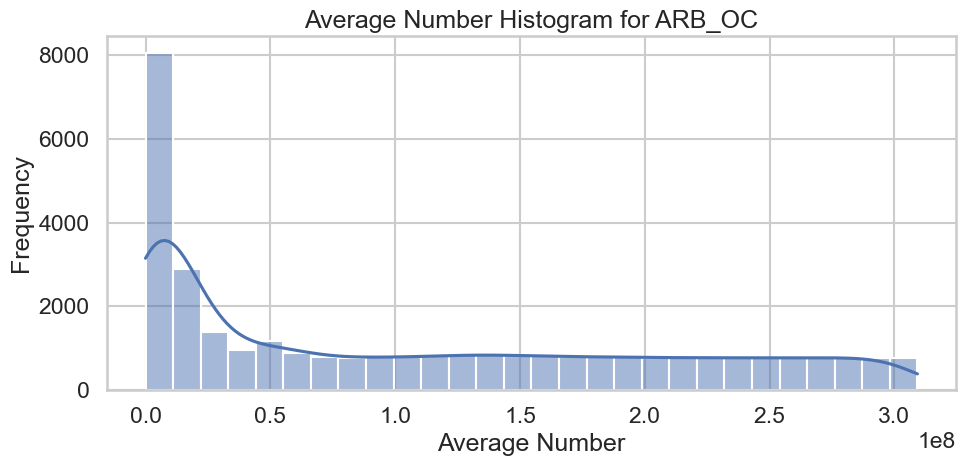

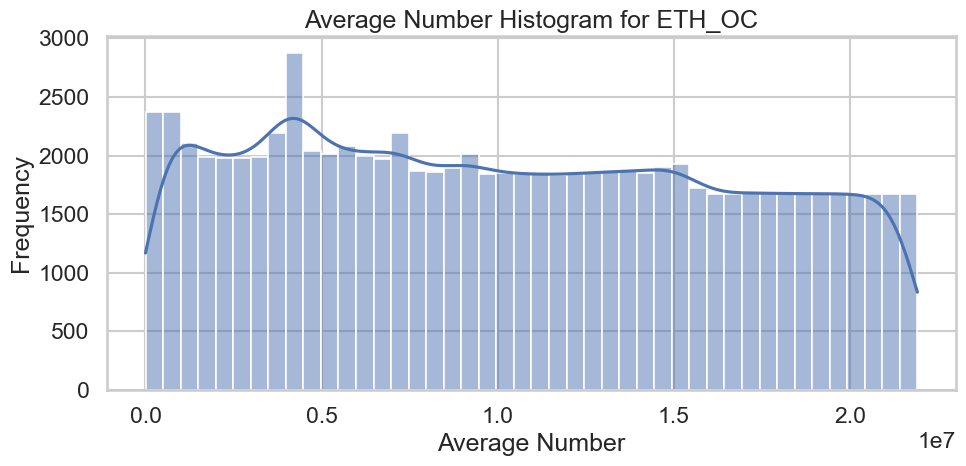

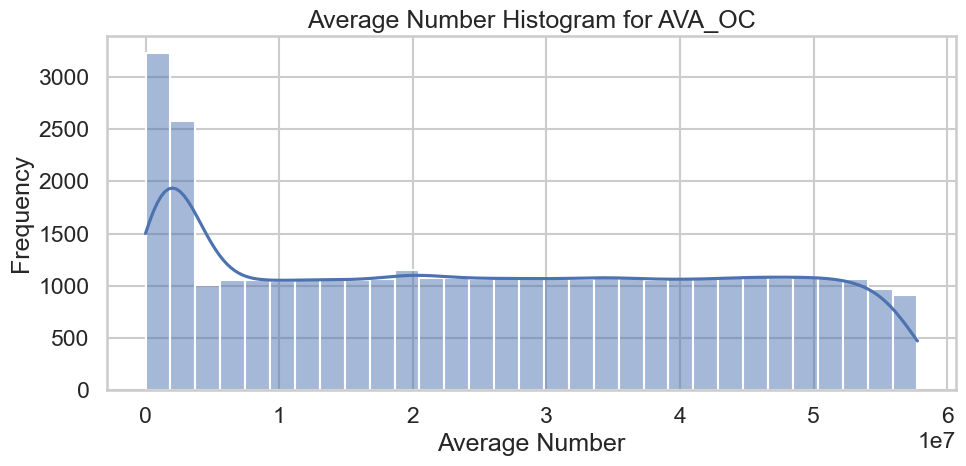

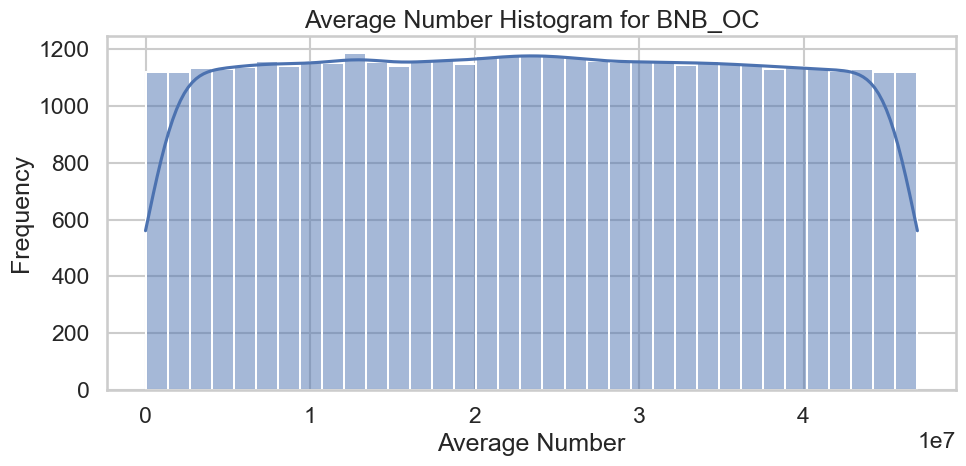

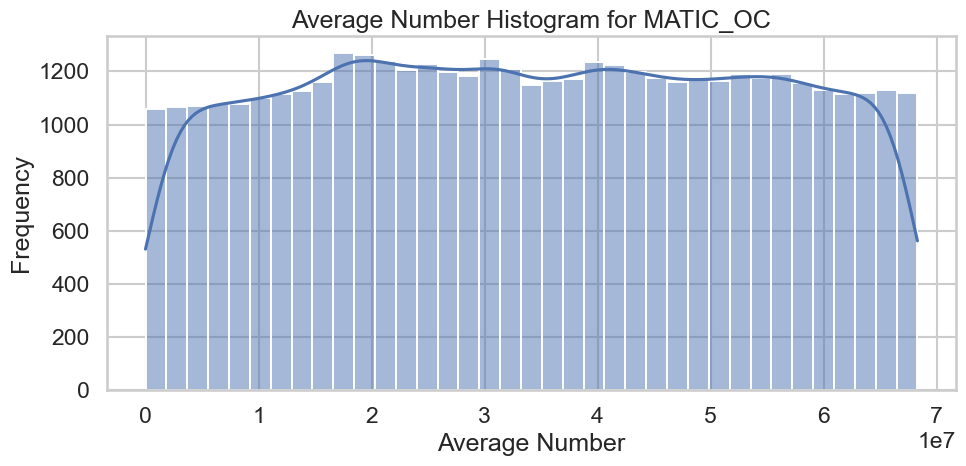

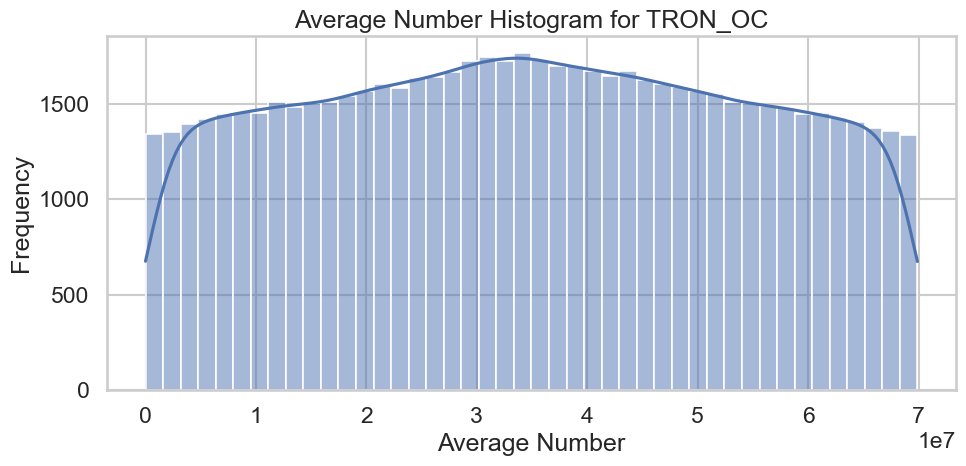

In [46]:
plot_histogram(df_average_number_all, "Average Number")

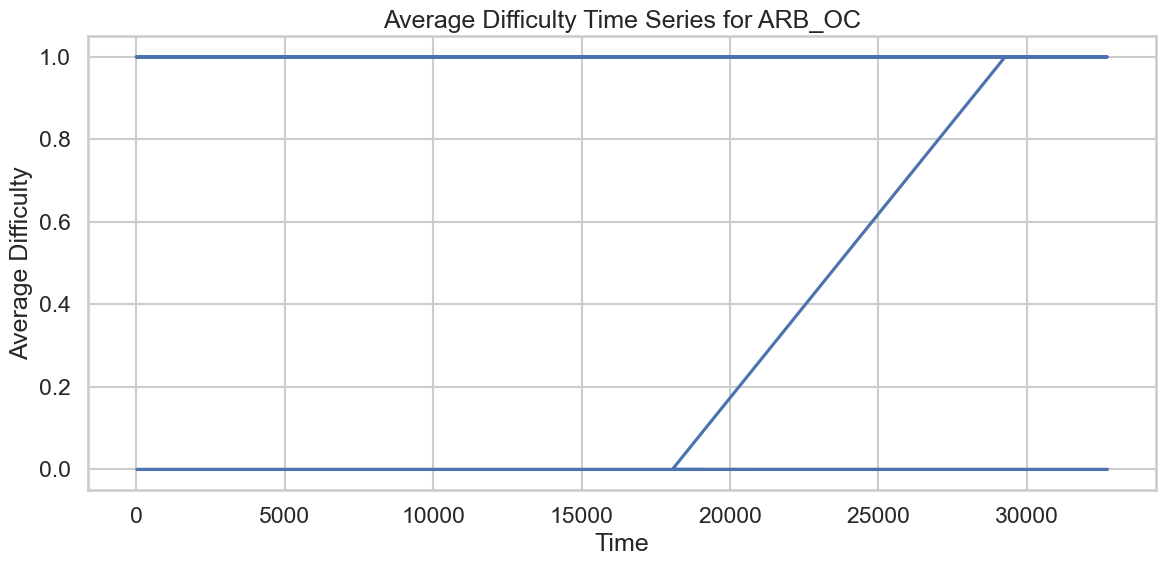

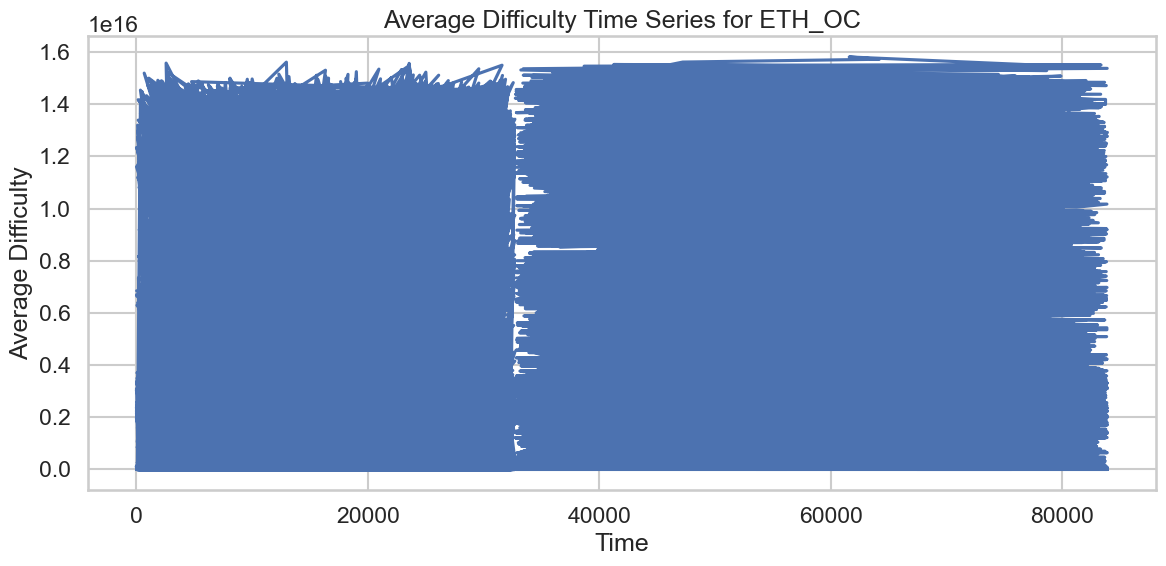

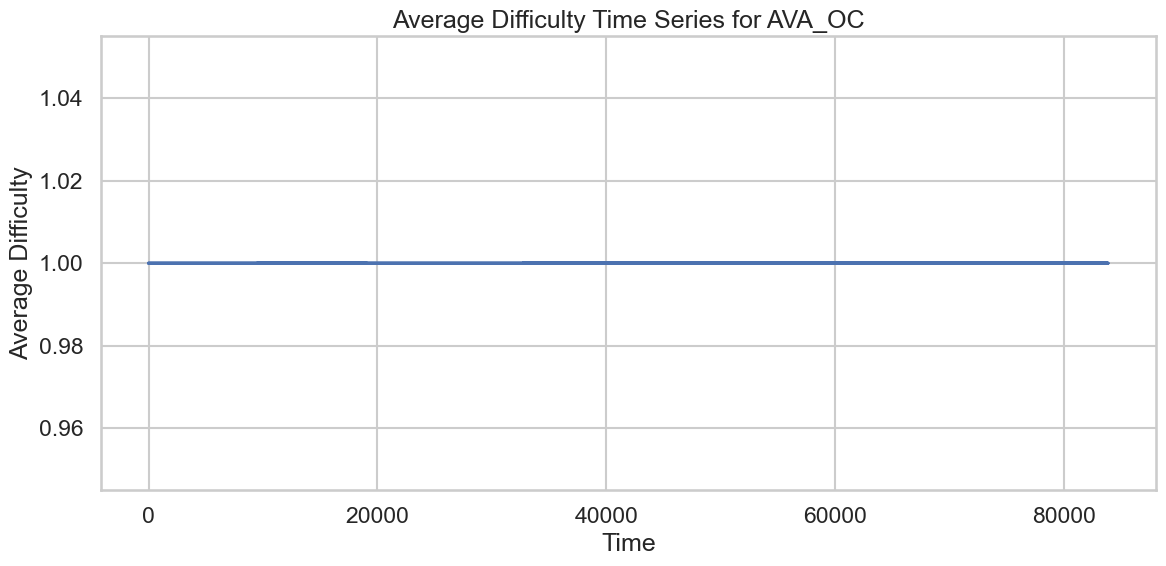

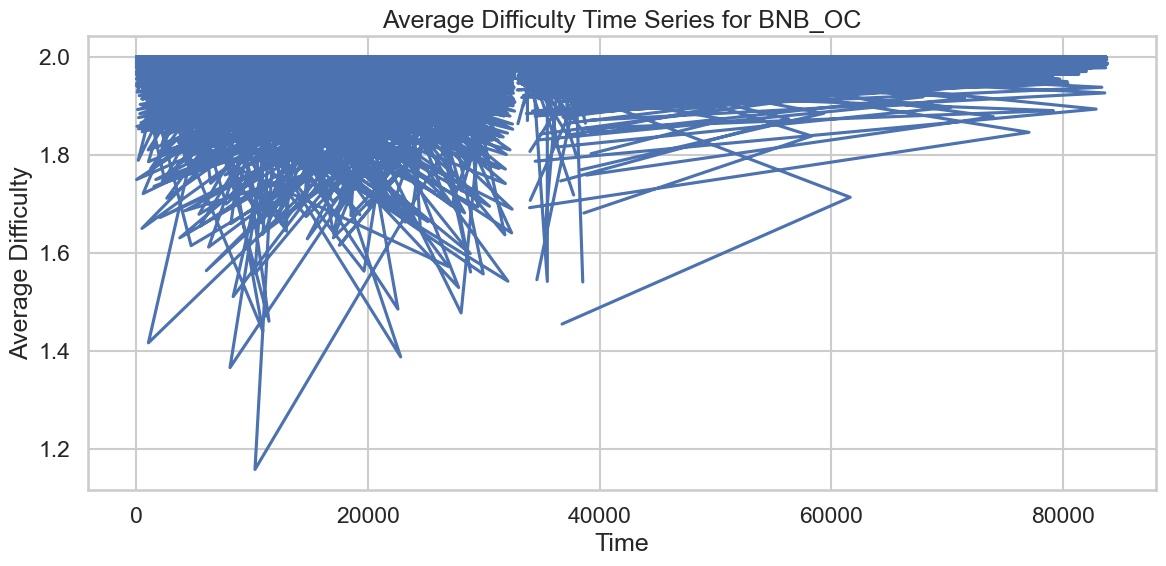

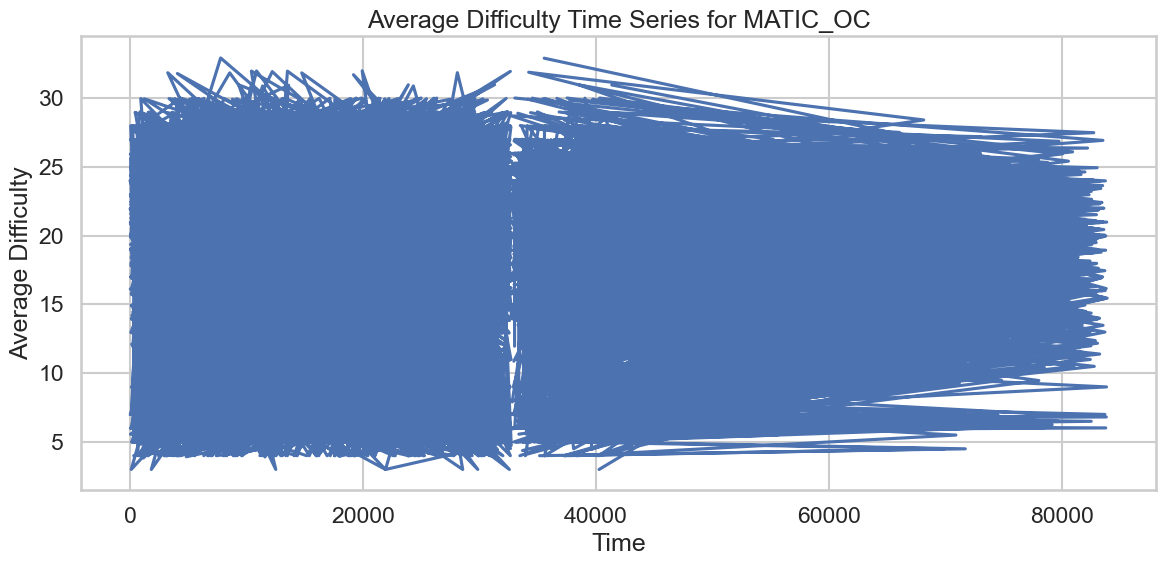

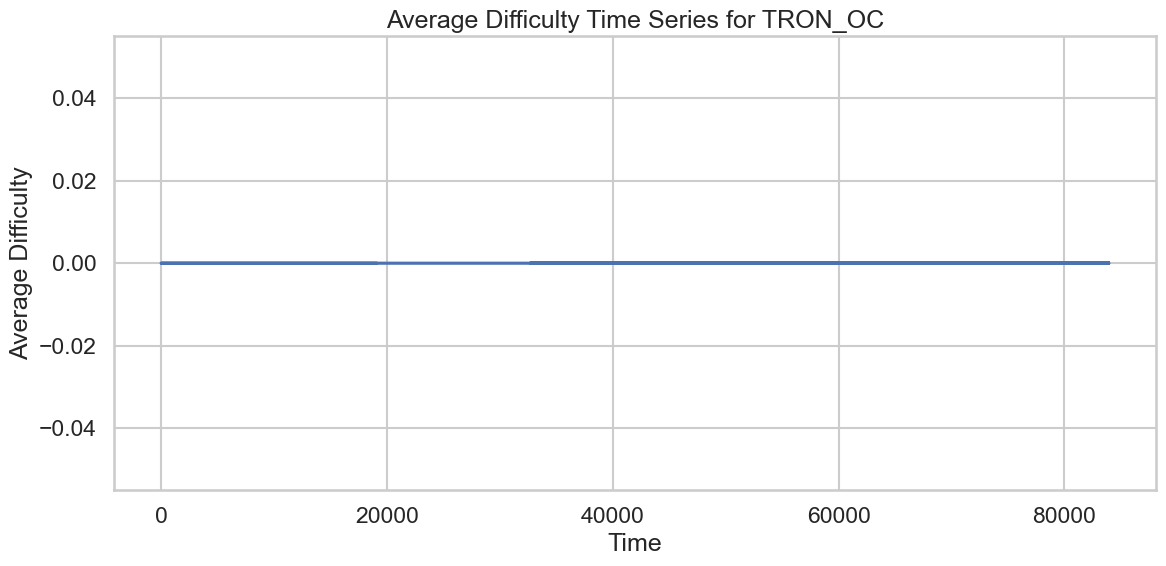

In [47]:
plot_timeseries(df_average_difficulty_all, "Average Difficulty")

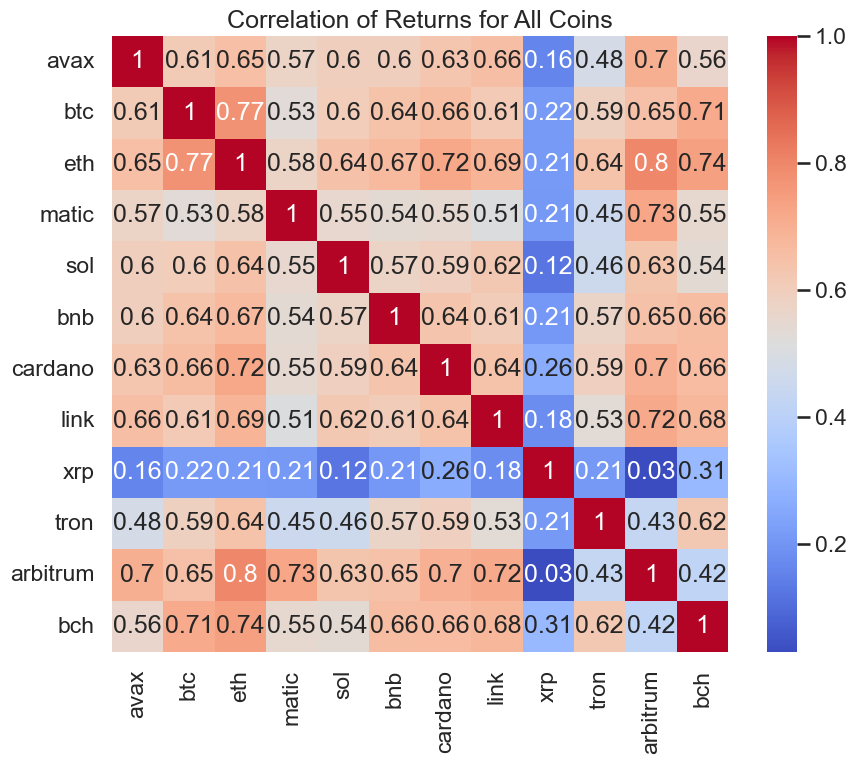

In [53]:
def plot_return_correlations(df, return_columns=None, title='Correlation of Returns', figsize=(10, 8)):
    if return_columns is None:
        return_columns = df.columns

    corr_matrix = df[return_columns].corr()
    
    corr_matrix.columns = corr_matrix.columns.str.replace('_return', '')
    corr_matrix.index = corr_matrix.index.str.replace('_return', '')
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(title)
    plt.show()

plot_return_correlations(all_returns_df, title='Correlation of Returns for All Coins')